# Submission: Menyelesaikan Permasalahan Human Resource

- Nama: Istia Budi
- Email: istiabudi@gmail.com
- Id Dicoding: istiabudi73

## Persiapan

### Menyiapkan library yang dibutuhkan

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

import warnings
warnings.filterwarnings('ignore')

### Menyiapkan data yang akan diguankan

In [3]:
url = 'https://raw.githubusercontent.com/dicodingacademy/dicoding_dataset/main/employee/employee_data.csv'

employee_df = pd.read_csv(url)
employee_df

,EmployeeId,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,38,NaN,Travel_Frequently,1444,Human Resources,1,4,Other,1,...,2,80,1,7,2,3,6,2,1,2
1,2,37,1.0,Travel_Rarely,1141,Research & Development,11,2,Medical,1,...,1,80,0,15,2,1,1,0,0,0
2,3,51,1.0,Travel_Rarely,1323,Research & Development,4,4,Life Sciences,1,...,3,80,3,18,2,4,10,0,2,7
3,4,42,0.0,Travel_Frequently,555,Sales,26,3,Marketing,1,...,4,80,1,23,2,4,20,4,4,8
4,5,40,NaN,Travel_Rarely,1194,Research & Development,2,4,Medical,1,...,2,80,3,20,2,3,5,3,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,1466,38,0.0,Travel_Rarely,168,Research & Development,1,3,Life Sciences,1,...,4,80,0,10,4,4,1,0,0,0
1466,1467,50,NaN,Travel_Rarely,813,Research & Development,17,5,Life Sciences,1,...,3,80,3,19,3,3,14,11,1,11
1467,1468,28,1.0,Travel_Rarely,1485,Research & Development,12,1,Life Sciences,1,...,4,80,0,1,4,2,1,1,0,0
1468,1469,40,0.0,Non-Travel,458,Research & Development,16,2,Life Sciences,1,...,2,80,1,6,0,3,4,2,0,0


## Data Understanding

In [4]:
employee_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmployeeId                1470 non-null   int64  
 1   Age                       1470 non-null   int64  
 2   Attrition                 1058 non-null   float64
 3   BusinessTravel            1470 non-null   object 
 4   DailyRate                 1470 non-null   int64  
 5   Department                1470 non-null   object 
 6   DistanceFromHome          1470 non-null   int64  
 7   Education                 1470 non-null   int64  
 8   EducationField            1470 non-null   object 
 9   EmployeeCount             1470 non-null   int64  
 10  EnvironmentSatisfaction   1470 non-null   int64  
 11  Gender                    1470 non-null   object 
 12  HourlyRate                1470 non-null   int64  
 13  JobInvolvement            1470 non-null   int64  
 14  JobLevel

In [5]:
employee_df.describe()

,EmployeeId,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1058.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,735.500000,36.923810,0.169187,802.485714,9.192517,2.912925,1.0,2.721769,65.891156,2.729932,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,424.496761,9.135373,0.375094,403.509100,8.106864,1.024165,0.0,1.093082,20.329428,0.711561,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,1.000000,18.000000,0.000000,102.000000,1.000000,1.000000,1.0,1.000000,30.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,368.250000,30.000000,0.000000,465.000000,2.000000,2.000000,1.0,2.000000,48.000000,2.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,735.500000,36.000000,0.000000,802.000000,7.000000,3.000000,1.0,3.000000,66.000000,3.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,1102.750000,43.000000,0.000000,1157.000000,14.000000,4.000000,1.0,4.000000,83.750000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,1470.000000,60.000000,1.000000,1499.000000,29.000000,5.000000,1.0,4.000000,100.000000,4.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [6]:
employee_df.describe(include='object')

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,1470,1470,1470,1470,1470,1470,1470,1470
unique,3,3,6,2,9,3,1,2
top,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No
freq,1043,961,606,882,326,673,1470,1054


## Data Preparation / Preprocessing

### Data Cleaning

#### Handling Missing Values

In [7]:
print(employee_df.isna().sum())

EmployeeId                    0
Age                           0
Attrition                   412
BusinessTravel                0
DailyRate                     0
Department                    0
DistanceFromHome              0
Education                     0
EducationField                0
EmployeeCount                 0
EnvironmentSatisfaction       0
Gender                        0
HourlyRate                    0
JobInvolvement                0
JobLevel                      0
JobRole                       0
JobSatisfaction               0
MaritalStatus                 0
MonthlyIncome                 0
MonthlyRate                   0
NumCompaniesWorked            0
Over18                        0
OverTime                      0
PercentSalaryHike             0
PerformanceRating             0
RelationshipSatisfaction      0
StandardHours                 0
StockOptionLevel              0
TotalWorkingYears             0
TrainingTimesLastYear         0
WorkLifeBalance               0
YearsAtC

In [8]:
employee_df.dropna(inplace=True)
print(employee_df.isna().sum())

EmployeeId                  0
Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [9]:
employee_df.shape

(1058, 35)

#### Handling Duplicate Data

In [10]:
employee_df.duplicated().sum()

0

#### Num to Text Decoding

In [11]:
attrition = {1: 'Yes', 0: 'No'}
employee_df['Attrition'] = employee_df['Attrition'].map(attrition)

education = {
    1: 'Below College',
    2: 'College',
    3: 'Bachelor',
    4: 'Master',
    5: 'Doctor'
}
employee_df['Education'] = employee_df['Education'].map(education)

rating = {
    1: 'Low',
    2: 'Good',
    3: 'Excellent',
    4: 'Outstanding'
}
employee_df['WorkLifeBalance'] = employee_df['WorkLifeBalance'].map(rating)
employee_df['PerformanceRating'] = employee_df['PerformanceRating'].map(rating)

satifaction = {
    1: 'Low',
    2: 'Medium',
    3: 'High',
    4: 'Very High'
}
employee_df['EnvironmentSatisfaction'] = employee_df['EnvironmentSatisfaction'].map(satifaction)
employee_df['JobInvolvement'] = employee_df['JobInvolvement'].map(satifaction)
employee_df['JobSatisfaction'] = employee_df['JobSatisfaction'].map(satifaction)
employee_df['RelationshipSatisfaction'] = employee_df['RelationshipSatisfaction'].map(satifaction)

In [12]:
employee_df

,EmployeeId,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1,2,37,Yes,Travel_Rarely,1141,Research & Development,11,College,Medical,1,...,Low,80,0,15,2,Low,1,0,0,0
2,3,51,Yes,Travel_Rarely,1323,Research & Development,4,Master,Life Sciences,1,...,High,80,3,18,2,Outstanding,10,0,2,7
3,4,42,No,Travel_Frequently,555,Sales,26,Bachelor,Marketing,1,...,Very High,80,1,23,2,Outstanding,20,4,4,8
6,7,40,No,Travel_Rarely,1124,Sales,1,College,Medical,1,...,High,80,3,6,2,Good,4,3,0,2
7,8,55,Yes,Travel_Rarely,725,Research & Development,2,Bachelor,Medical,1,...,Very High,80,1,24,2,Excellent,5,2,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1464,1465,28,Yes,Non-Travel,1366,Research & Development,24,College,Technical Degree,1,...,Low,80,0,10,2,Good,10,7,1,9
1465,1466,38,No,Travel_Rarely,168,Research & Development,1,Bachelor,Life Sciences,1,...,Very High,80,0,10,4,Outstanding,1,0,0,0
1467,1468,28,Yes,Travel_Rarely,1485,Research & Development,12,Below College,Life Sciences,1,...,Very High,80,0,1,4,Good,1,1,0,0
1468,1469,40,No,Non-Travel,458,Research & Development,16,College,Life Sciences,1,...,Medium,80,1,6,0,Excellent,4,2,0,0


In [13]:
employee_df.to_csv('employee_data_cleaned.csv',index=False)

### EDA

In [14]:
numerical_features, categorical_features = [], []

for feature in employee_df.columns:
    if employee_df[feature].dtype == 'object':
        categorical_features.append(feature)
    else:
        numerical_features.append(feature)

#### Univariate Categorical Analysis

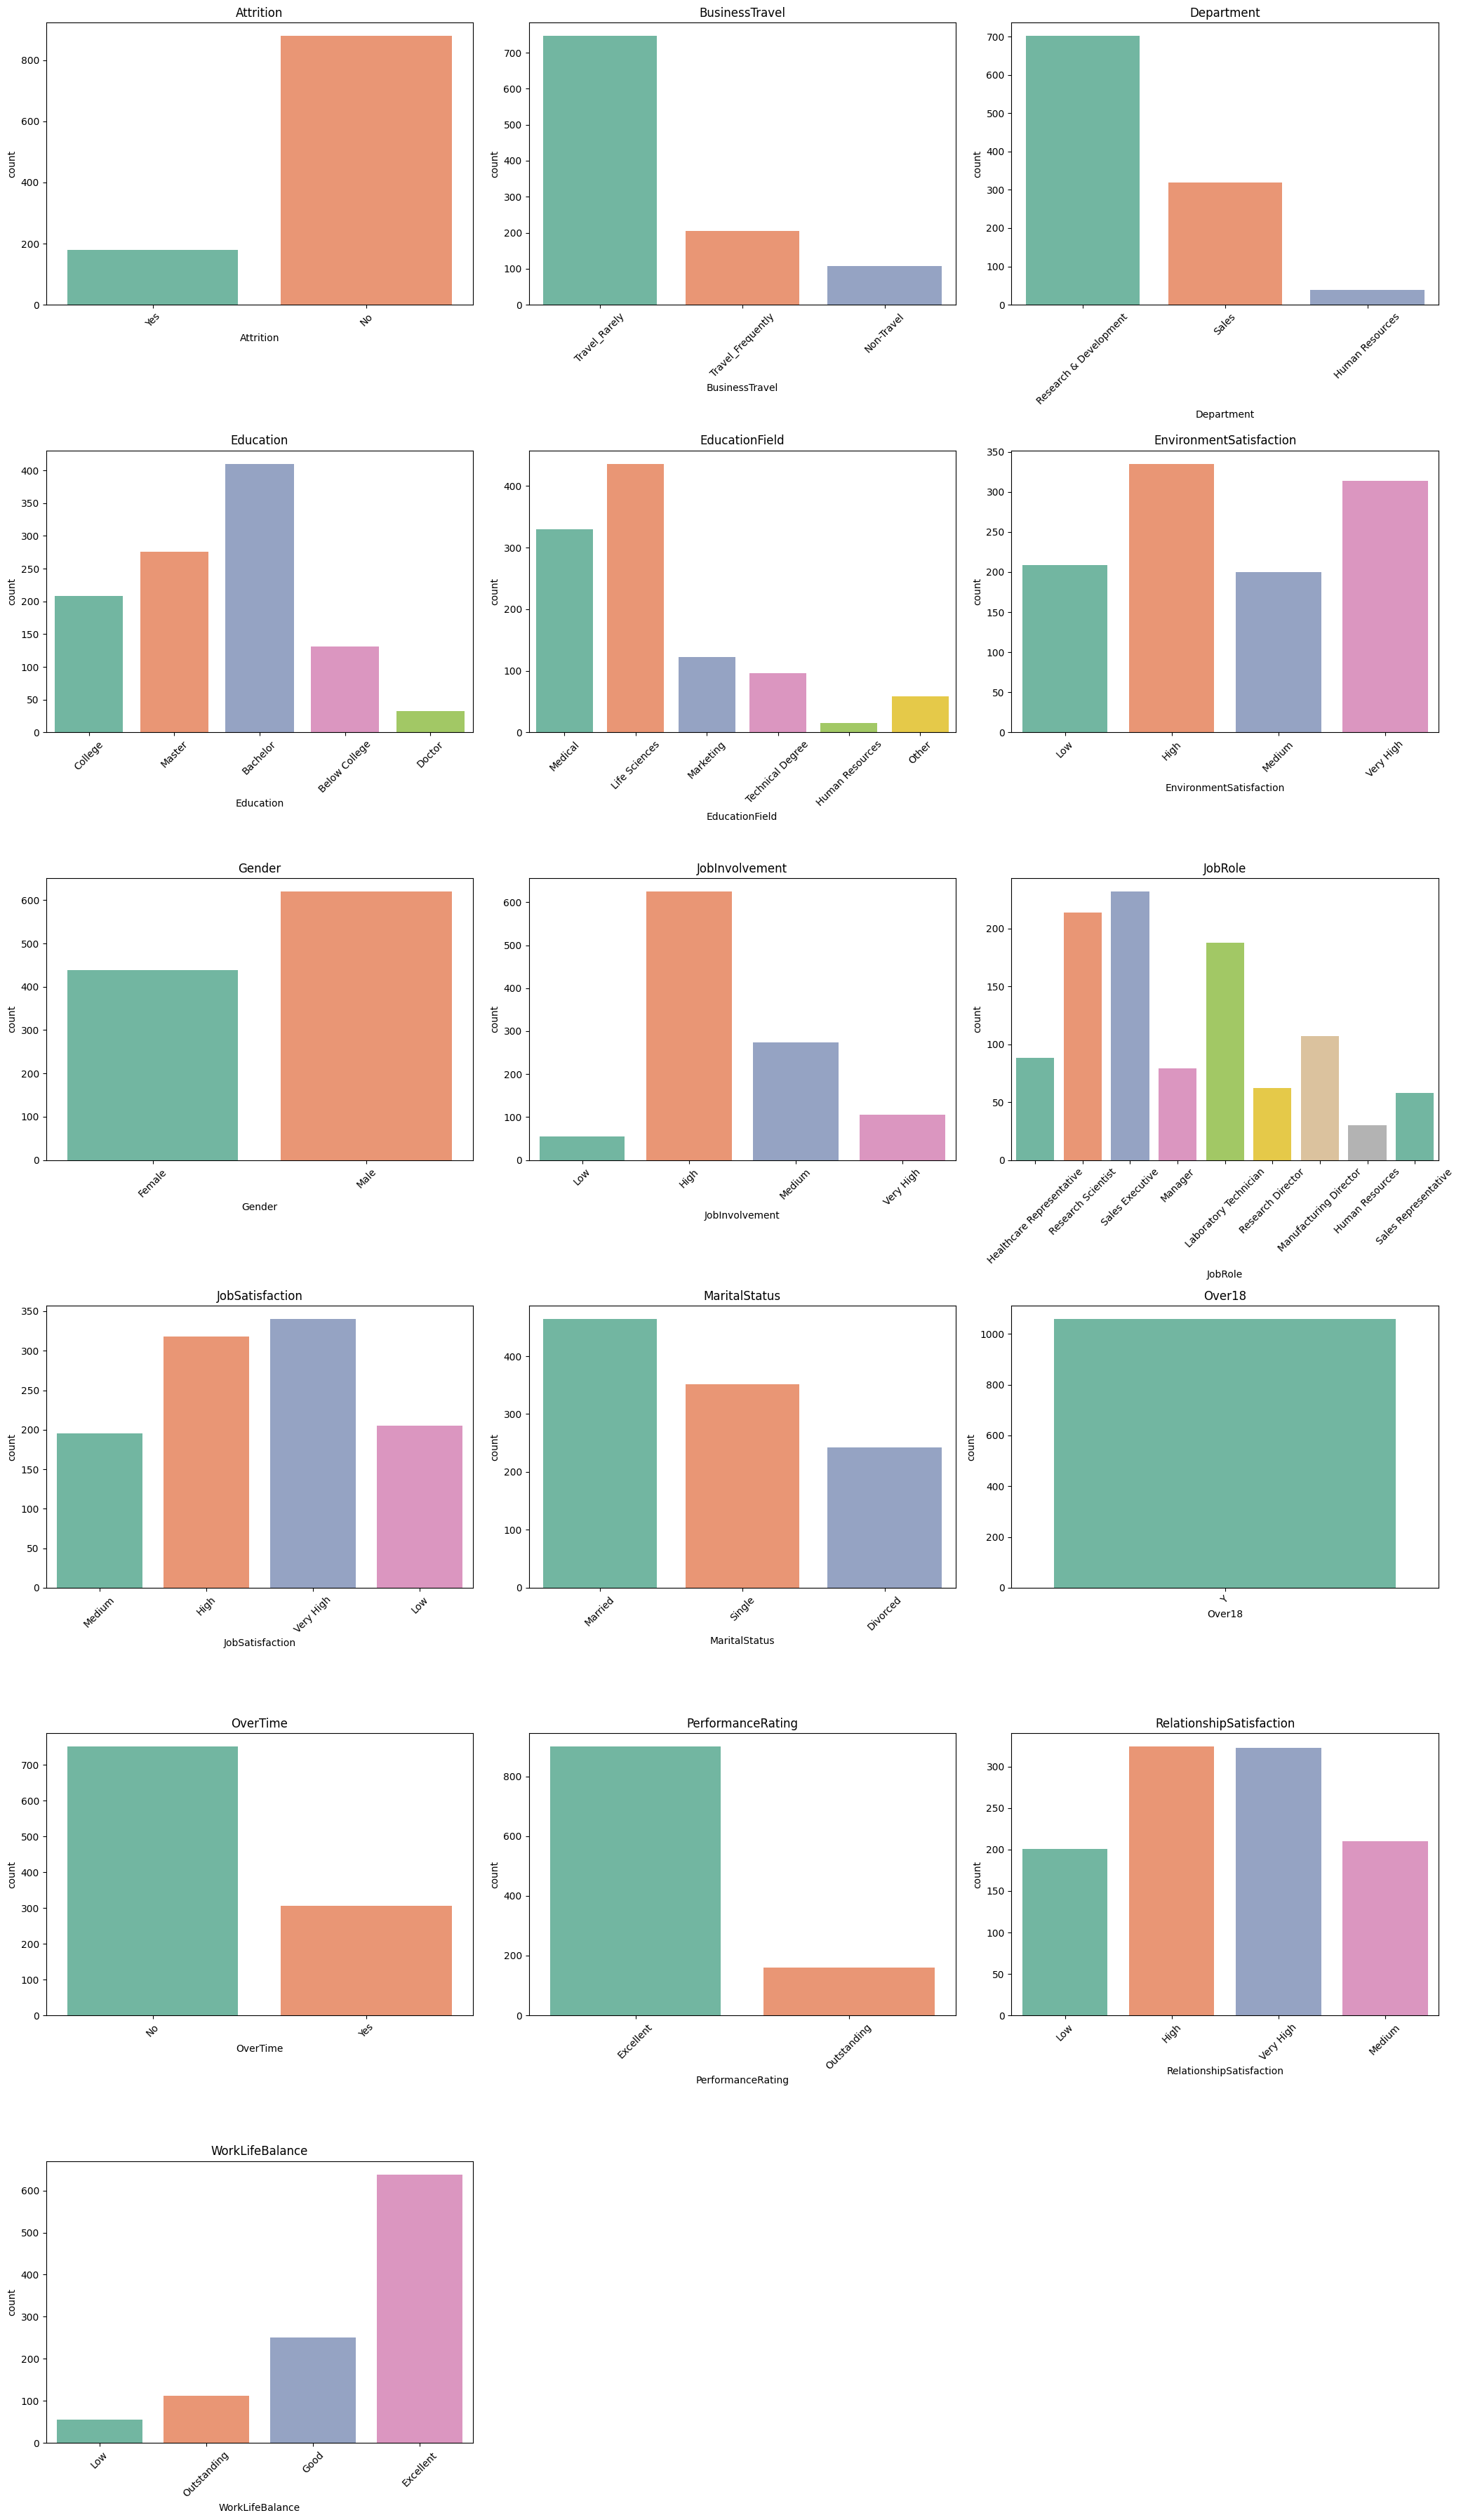

In [15]:
num_cat = len(categorical_features)

cols = 3
rows = int(np.ceil(num_cat/cols))

fig, ax = plt.subplots(rows, cols, figsize=(21, 6* rows))
ax = ax.flatten()

for i, feature in enumerate(categorical_features):
    sns.countplot(x=employee_df[feature], ax=ax[i], palette='Set2')
    ax[i].set_title(feature)
    ax[i].tick_params(axis='x', labelrotation=45)

for j in range(i + 1, len(ax)):
    fig.delaxes(ax[j])

plt.tight_layout()
plt.show()

#### Univariate Numerical Analysis

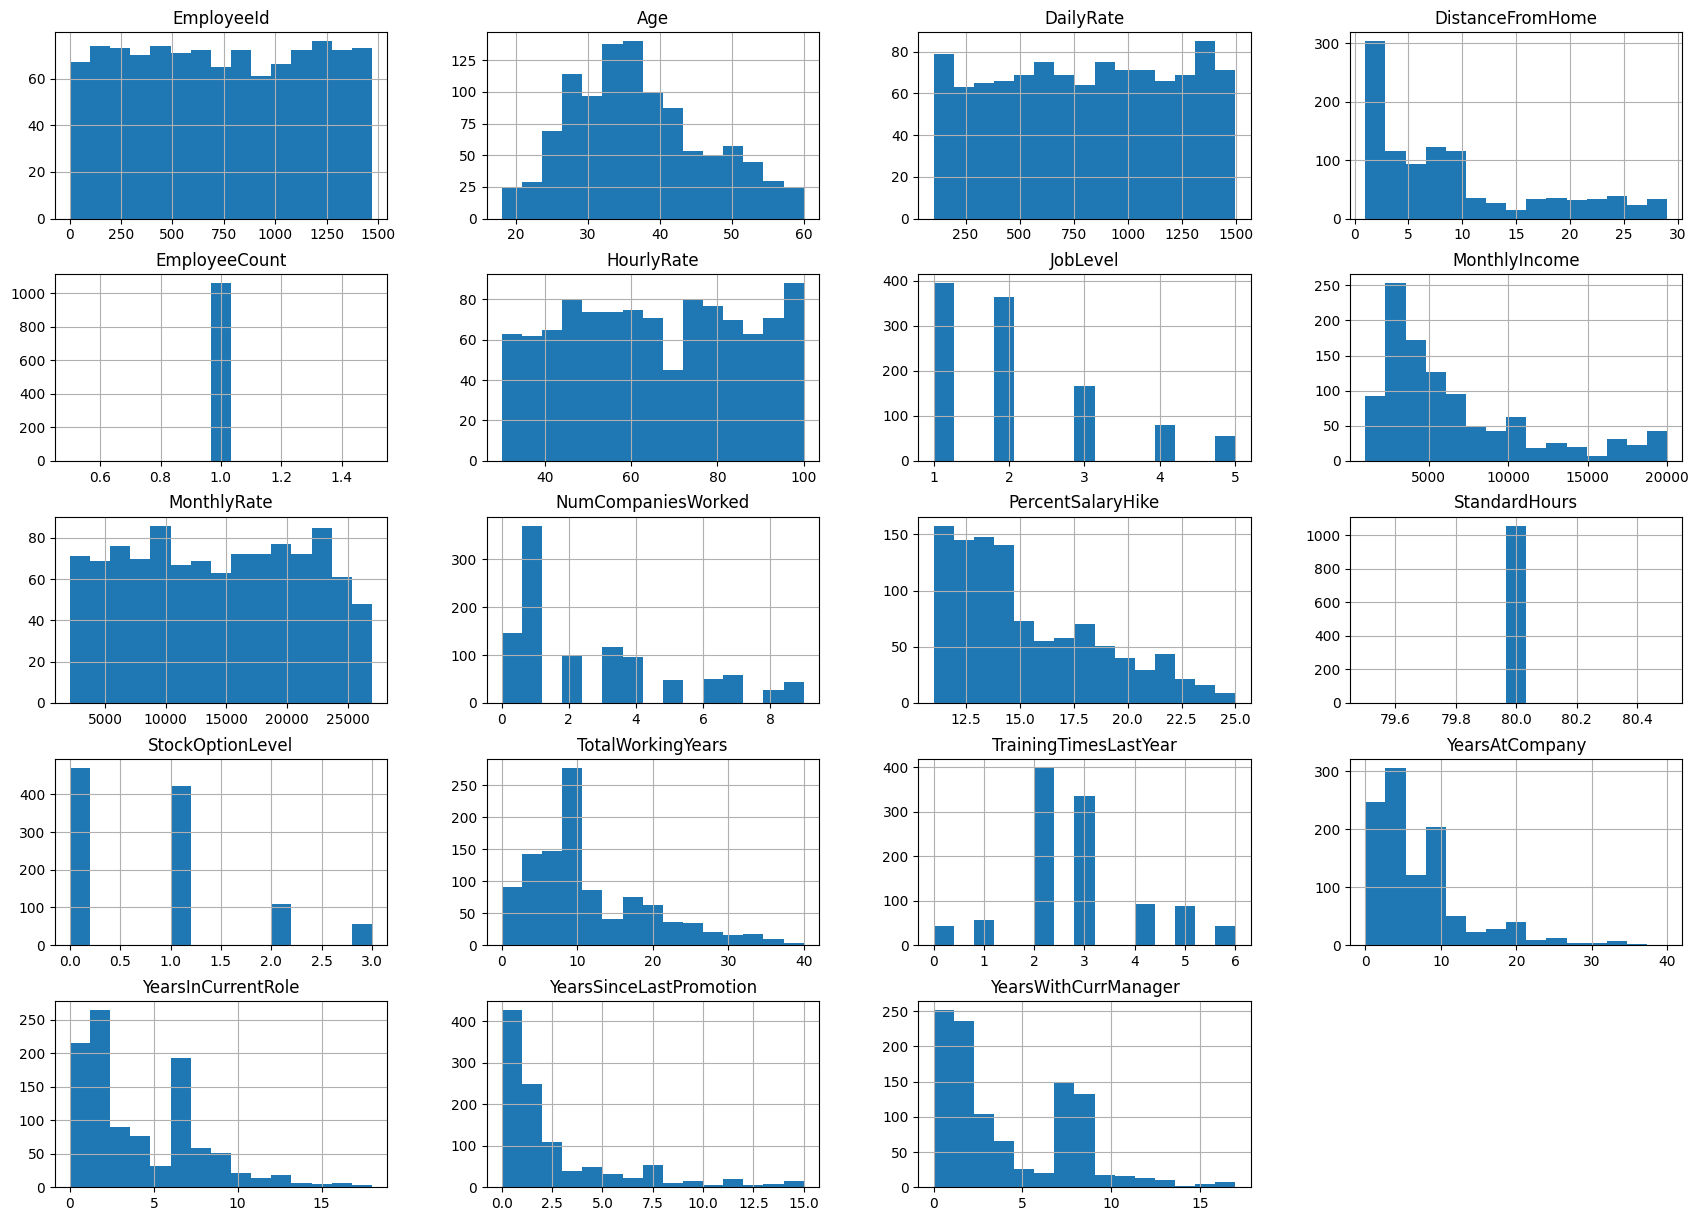

In [16]:
employee_df[numerical_features].hist(bins=15, figsize=(21, 15))
plt.show()

Sebagian besar sebaran data berdasarkan grafik diatas adalah right-skewed.

#### Categorical Multivariate Analysis

In [17]:
def categorical_multivariate(features, df, label=None):
    """Membuat boxplot untuk analisis multivariat dengan layout grid simetris.

    Args:
        - features (list): List fitur numerik yang ingin diplot.
        - df (DataFrame): DataFrame yang berisi data.
        - label (str, optional): Kolom kategori (opsional).
    """
    fig, ax = plt.subplots(len(features), 1, figsize=(16, 18))
    ax = ax.flatten()
    for i, feature in enumerate(features):
        if label:
            sns.countplot(data=df, x=feature, hue=label, ax=ax[i])
            ax[i].set_title(f'{label} Distribution Plot Berdasarkan {feature}')
        else:
            sns.countplot(data=df, x=label, ax=ax[i])
            ax[i].set_title(f'{features} Distribution Plot')

        ax[i].set_ylabel(None)
        ax[i].grid(True)

    plt.tight_layout()
    plt.show

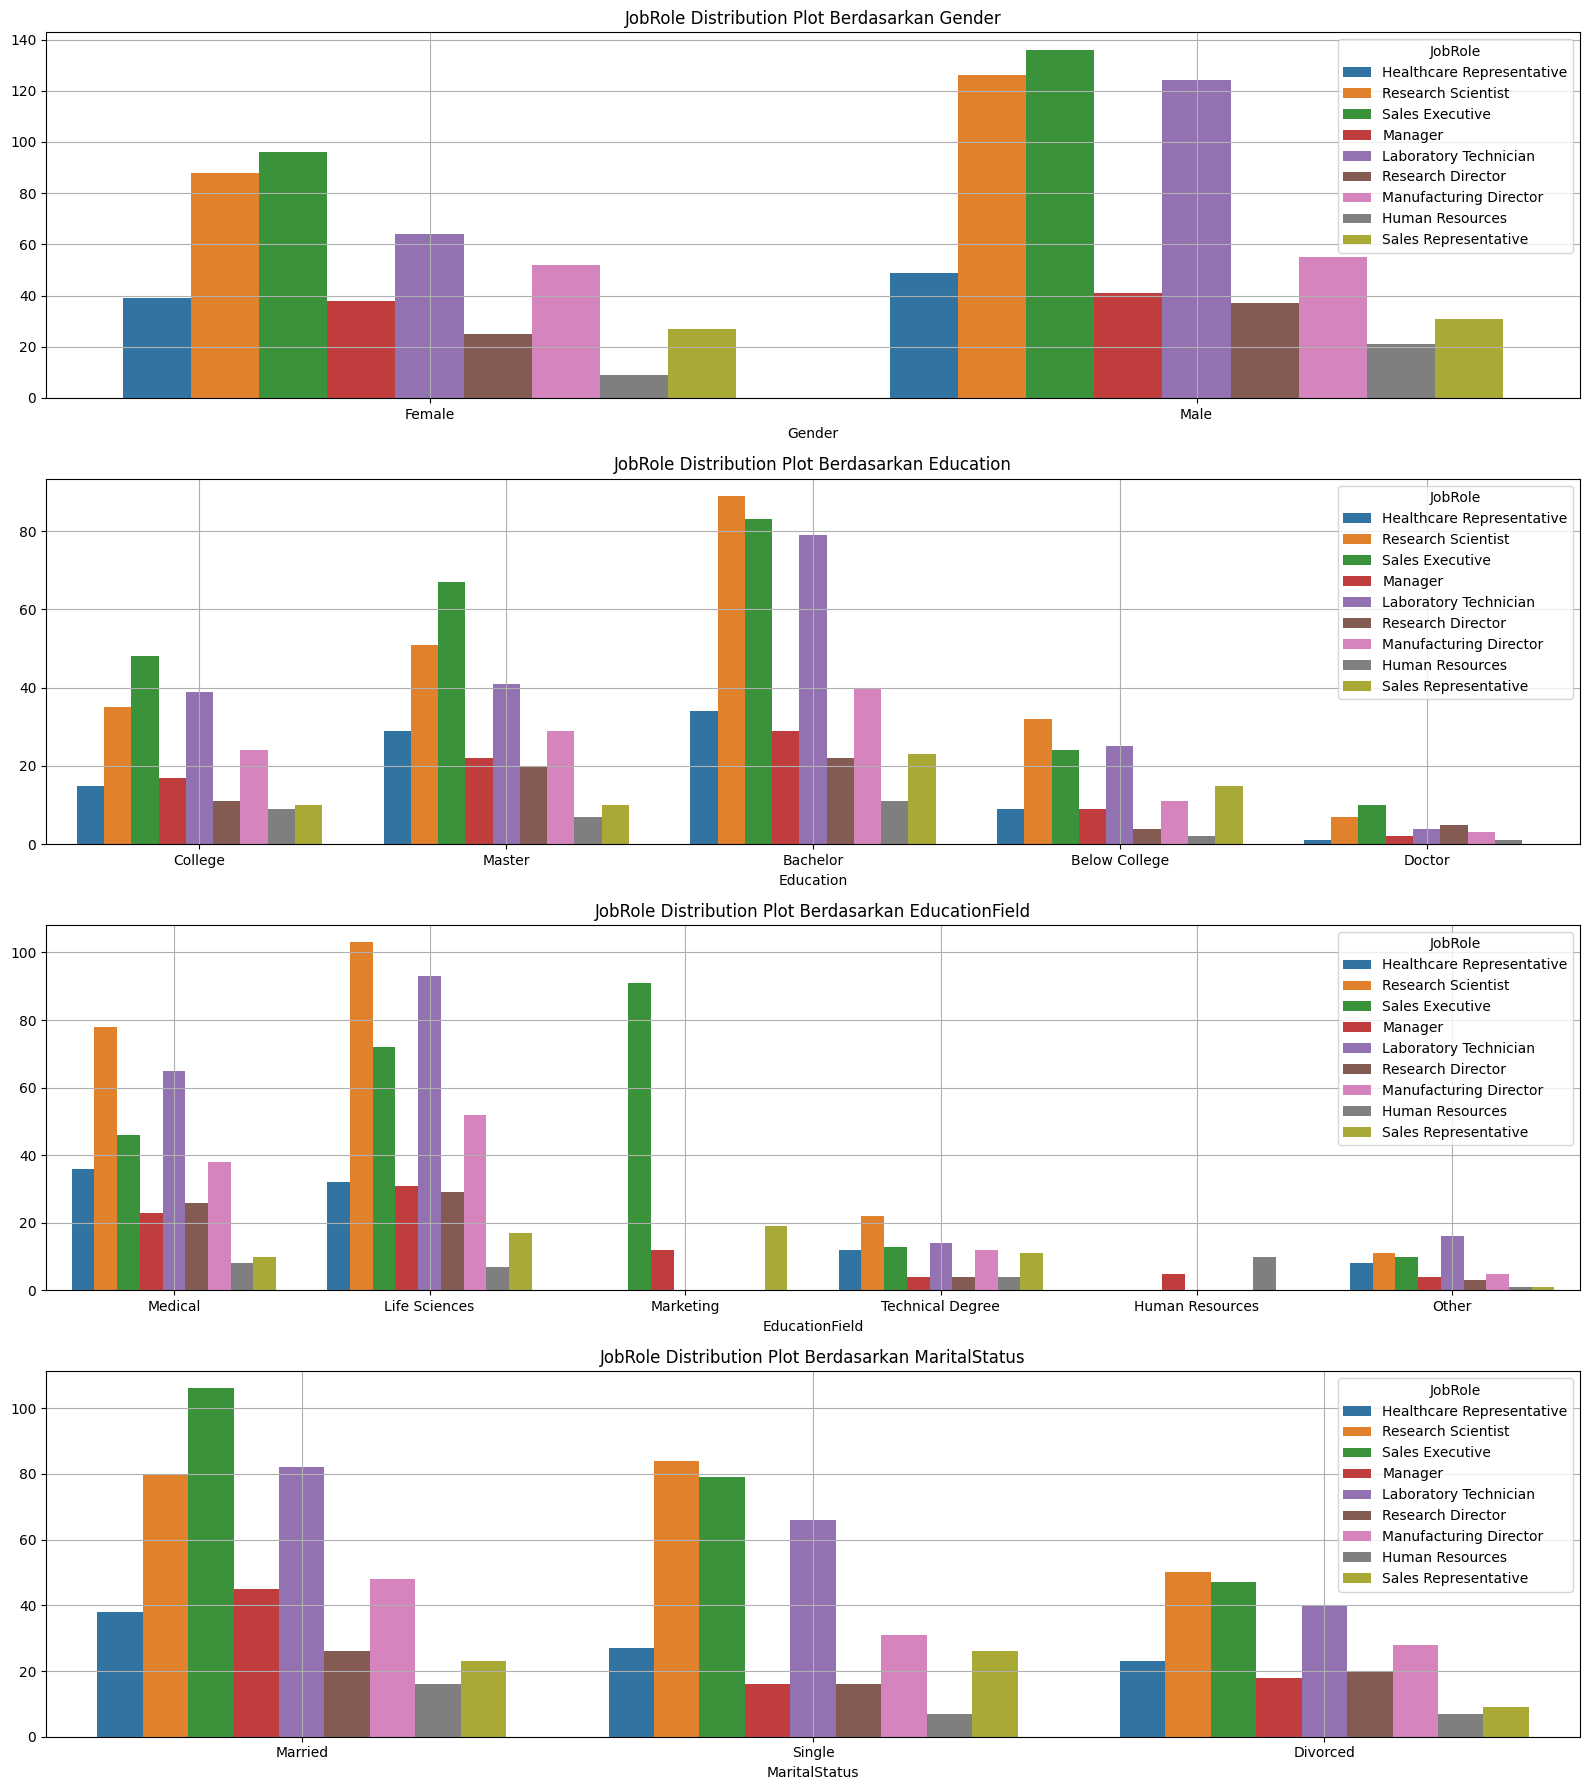

In [18]:
categorical_multivariate(
    features=['Gender', 'Education', 'EducationField', 'MaritalStatus'],
    df=employee_df,
    label='JobRole'
)

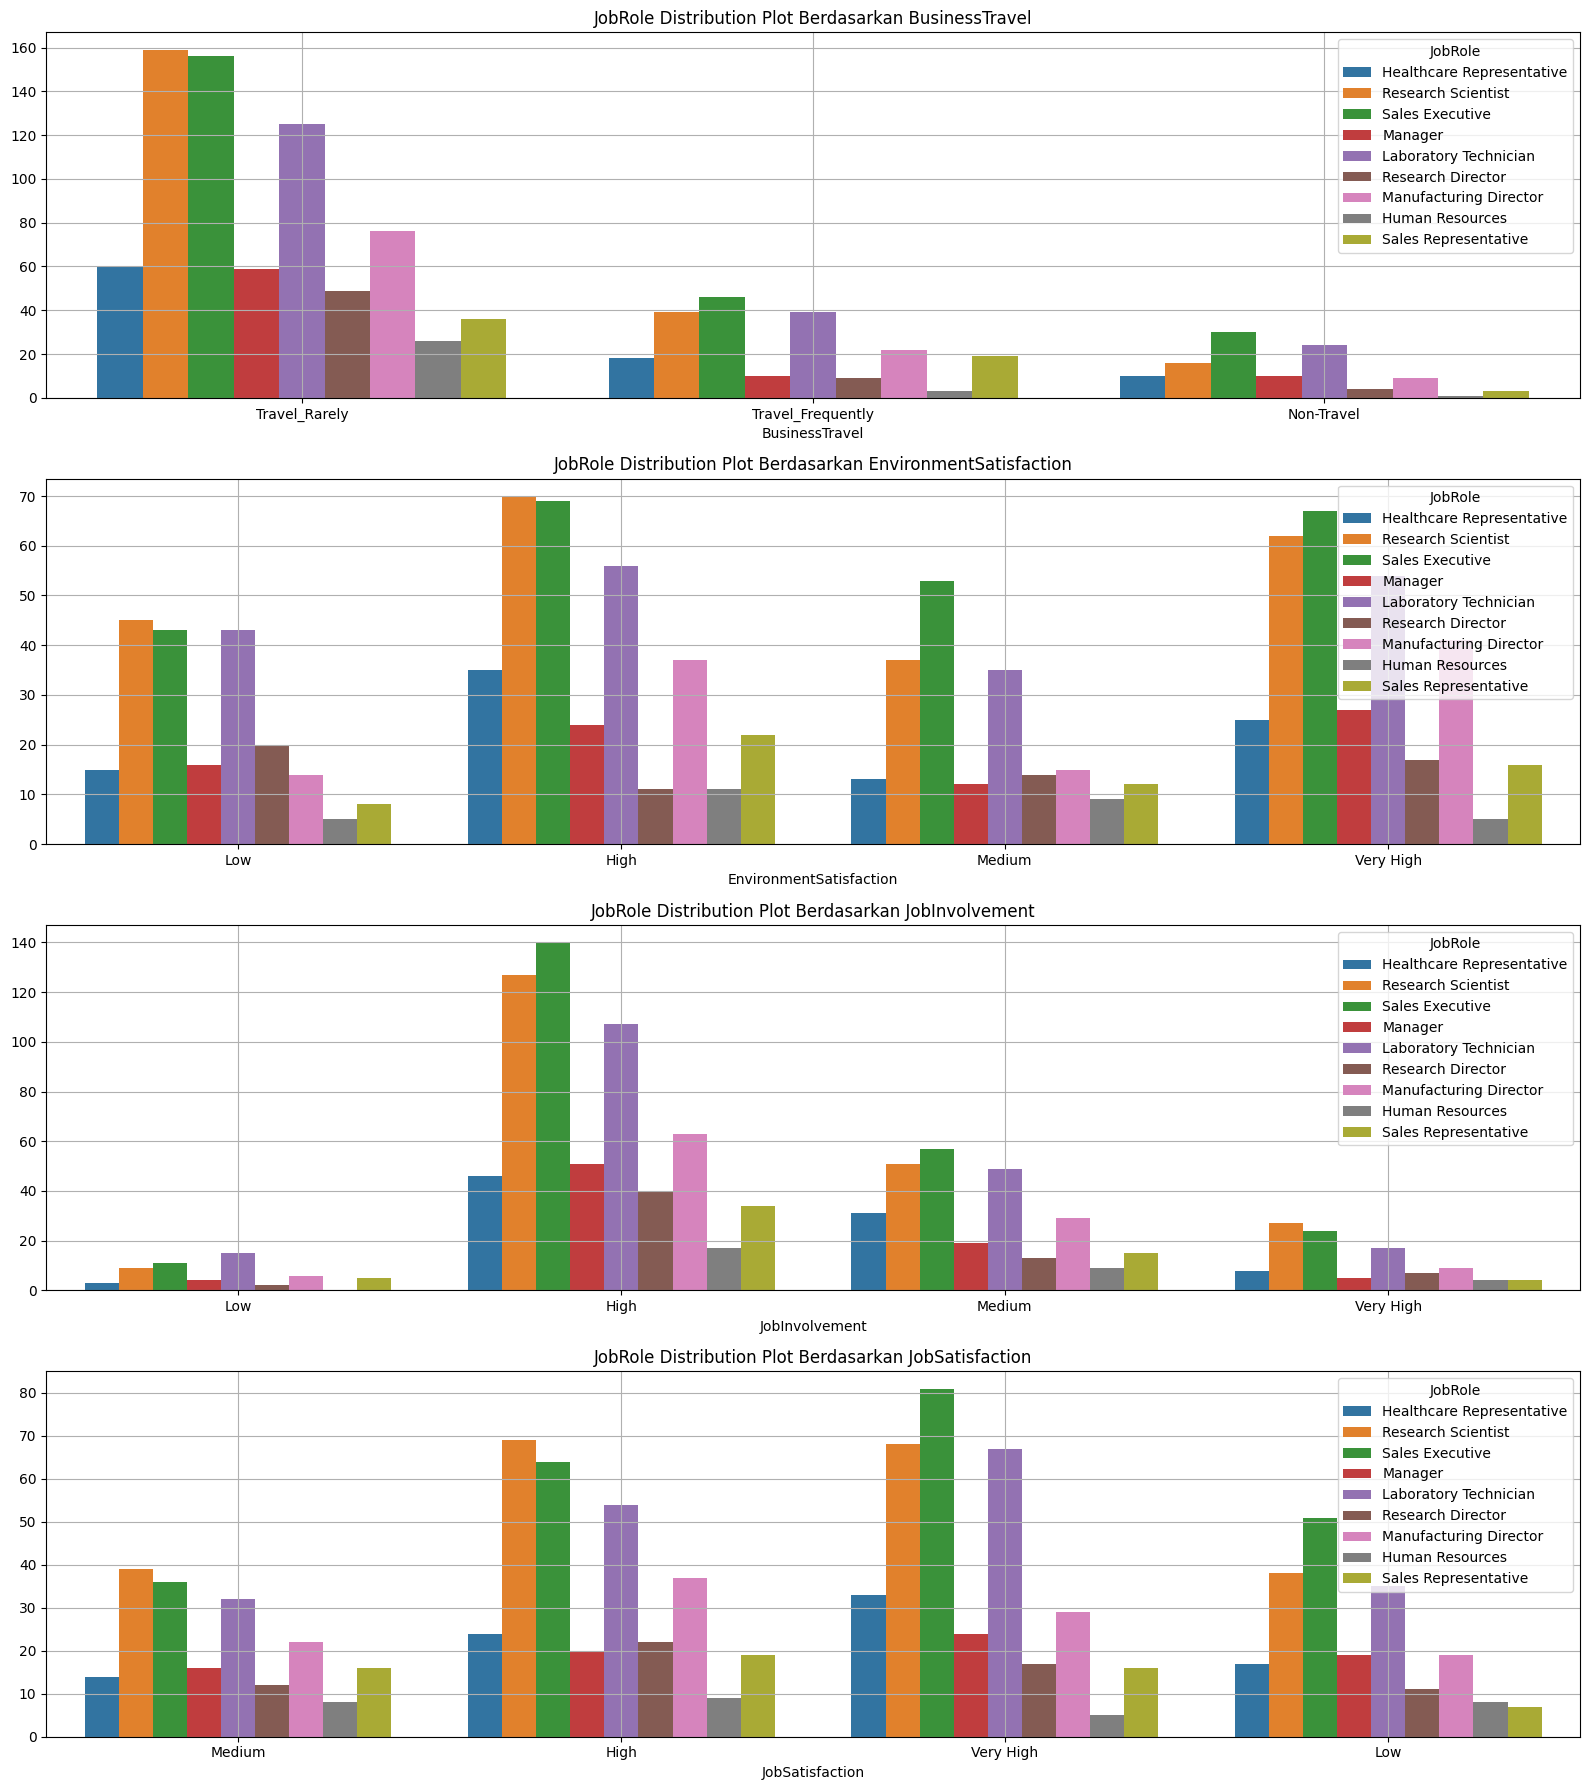

In [19]:
categorical_multivariate(
    features=['BusinessTravel', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobSatisfaction'],
    df=employee_df,
    label='JobRole'
)

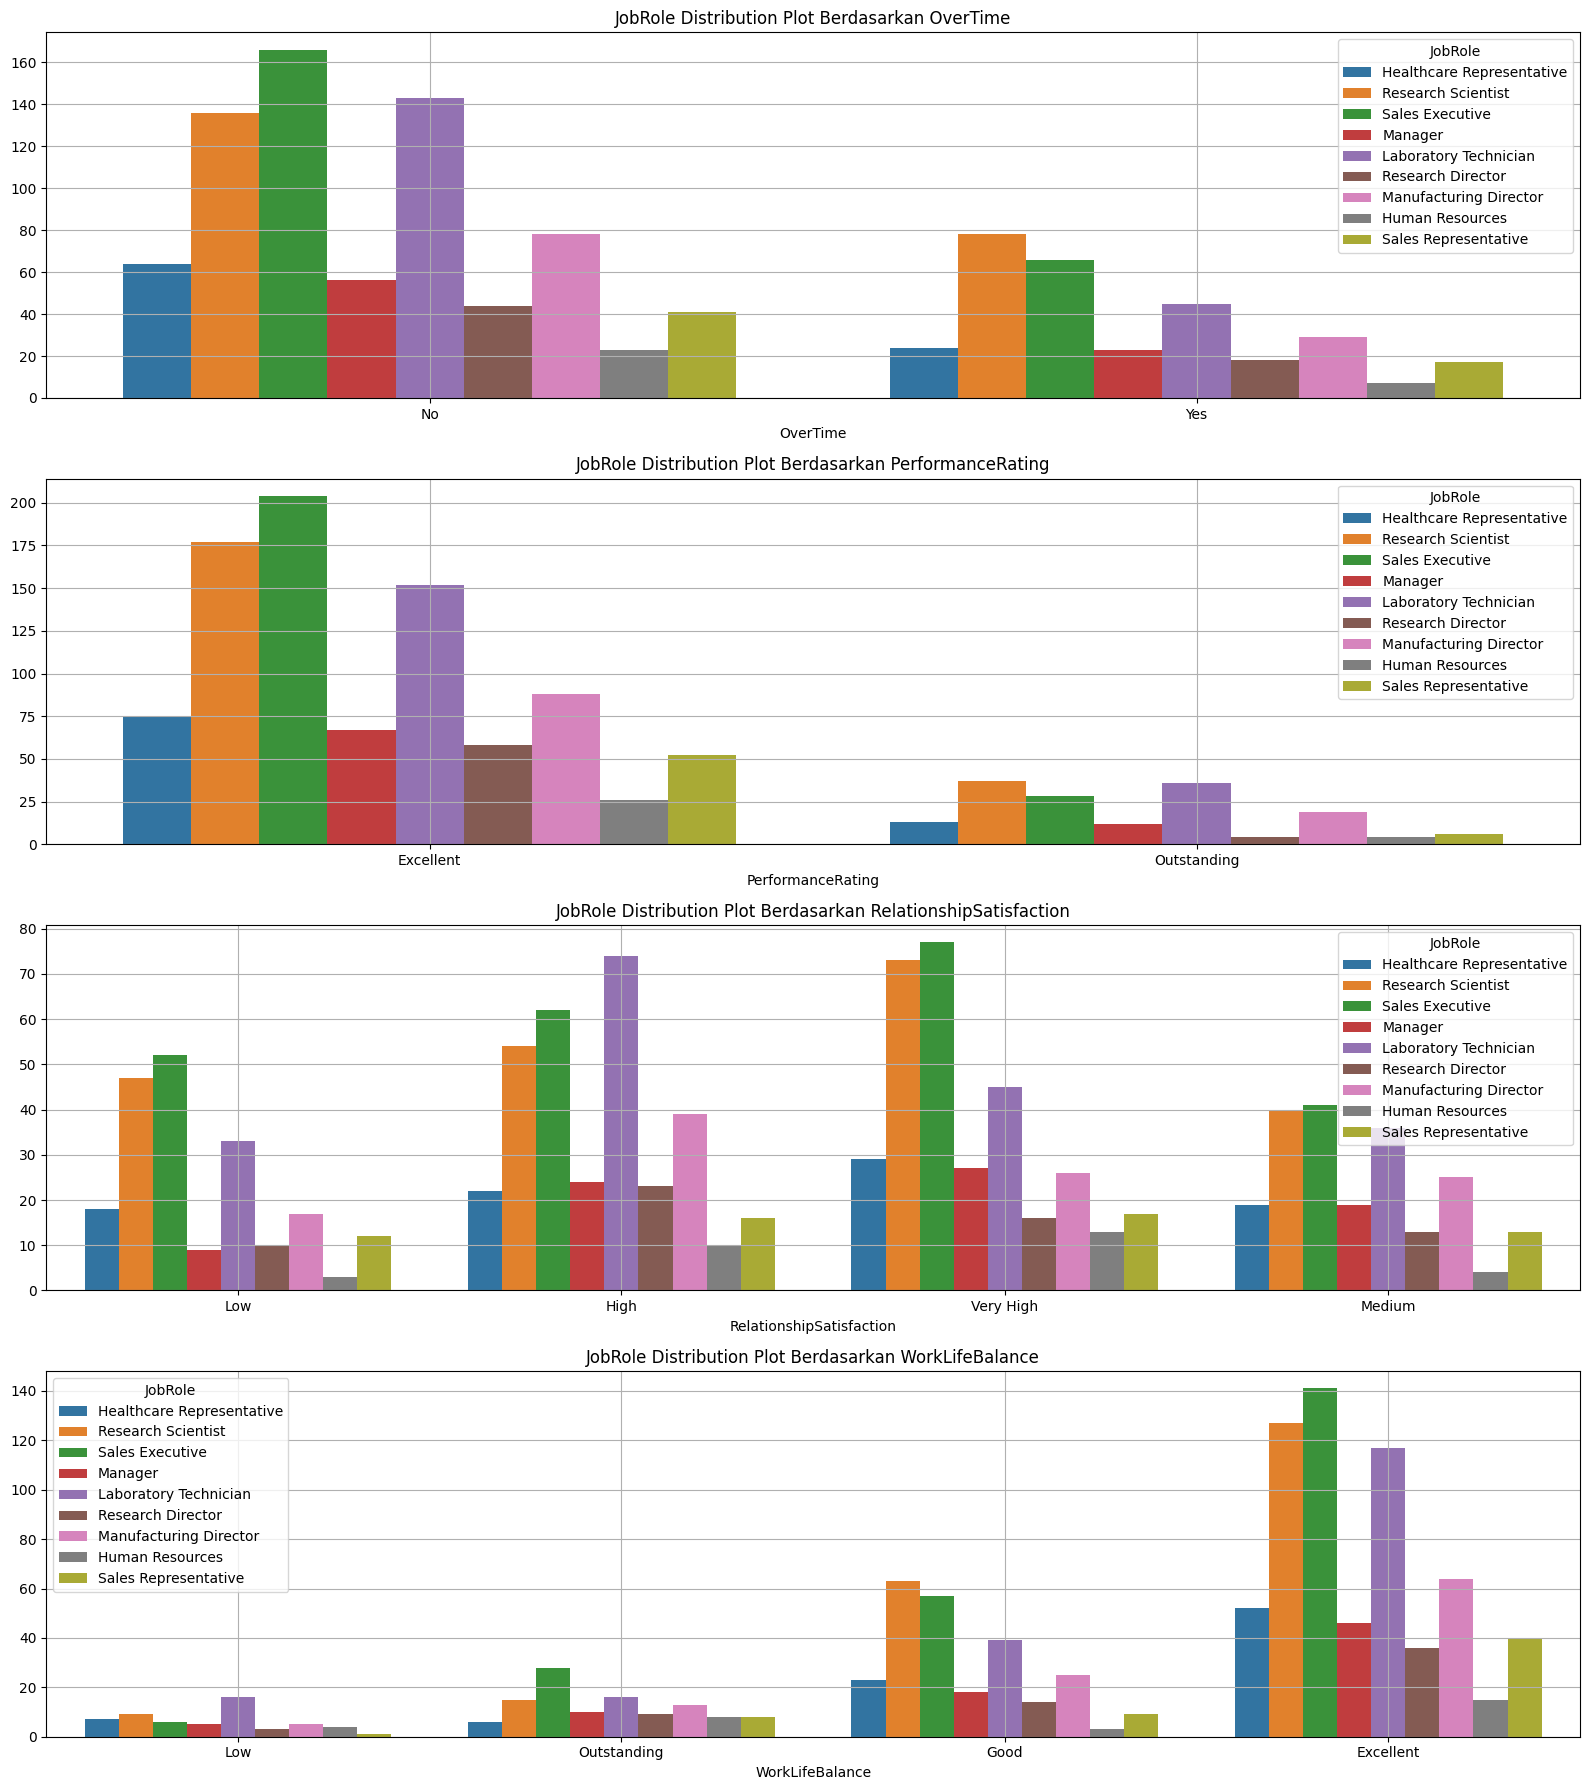

In [20]:
categorical_multivariate(
    features=['OverTime', 'PerformanceRating', 'RelationshipSatisfaction', 'WorkLifeBalance'],
    df=employee_df,
    label='JobRole'
)

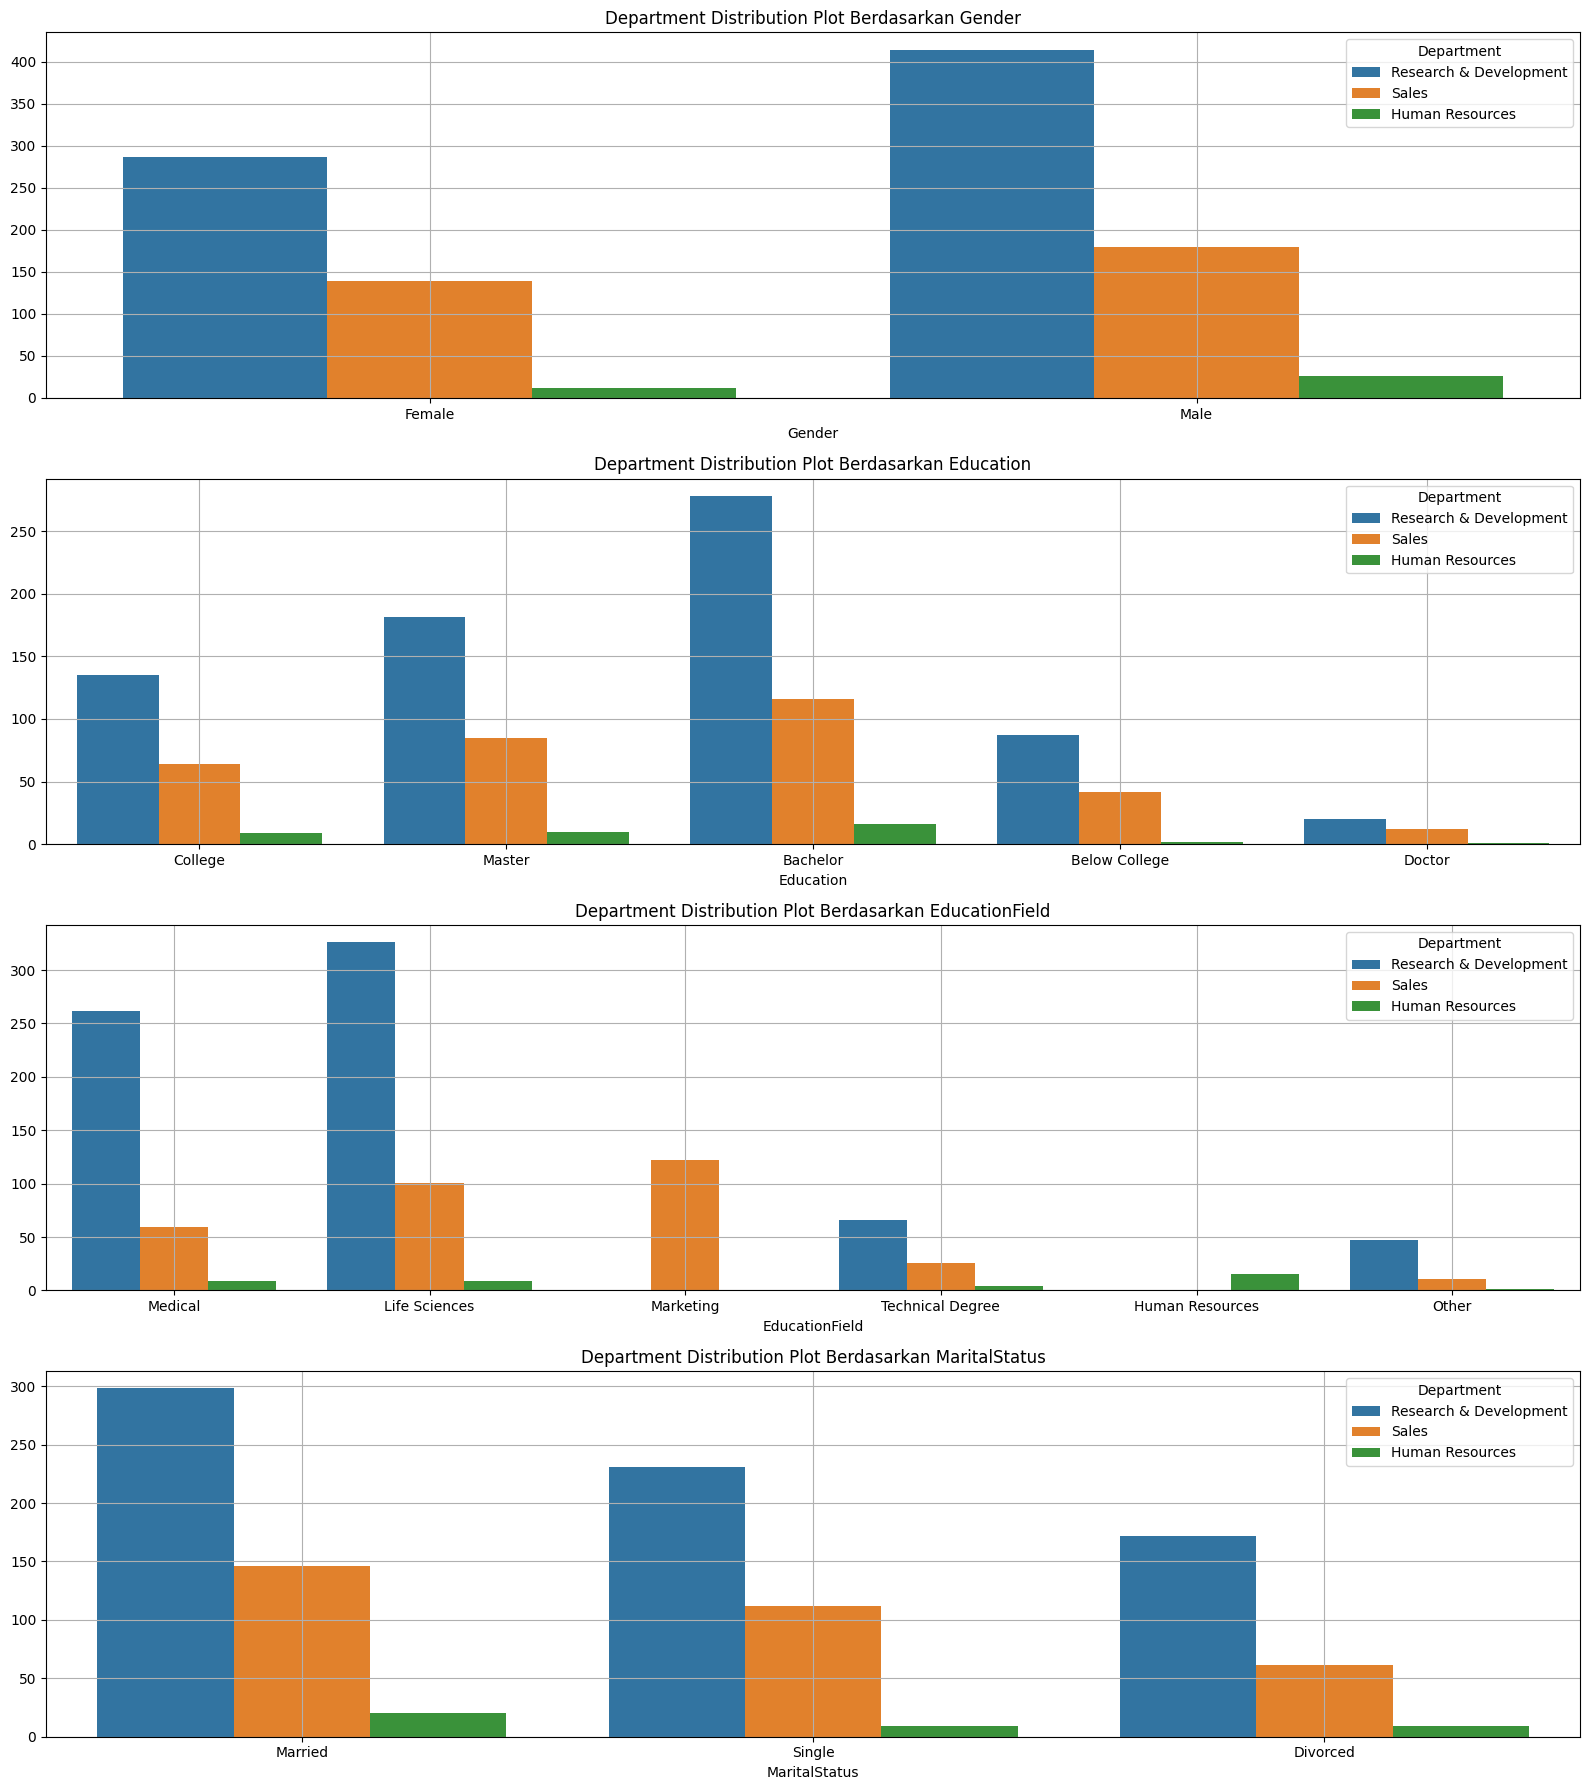

In [21]:
categorical_multivariate(
    features=['Gender', 'Education', 'EducationField', 'MaritalStatus'],
    df=employee_df,
    label='Department'
)

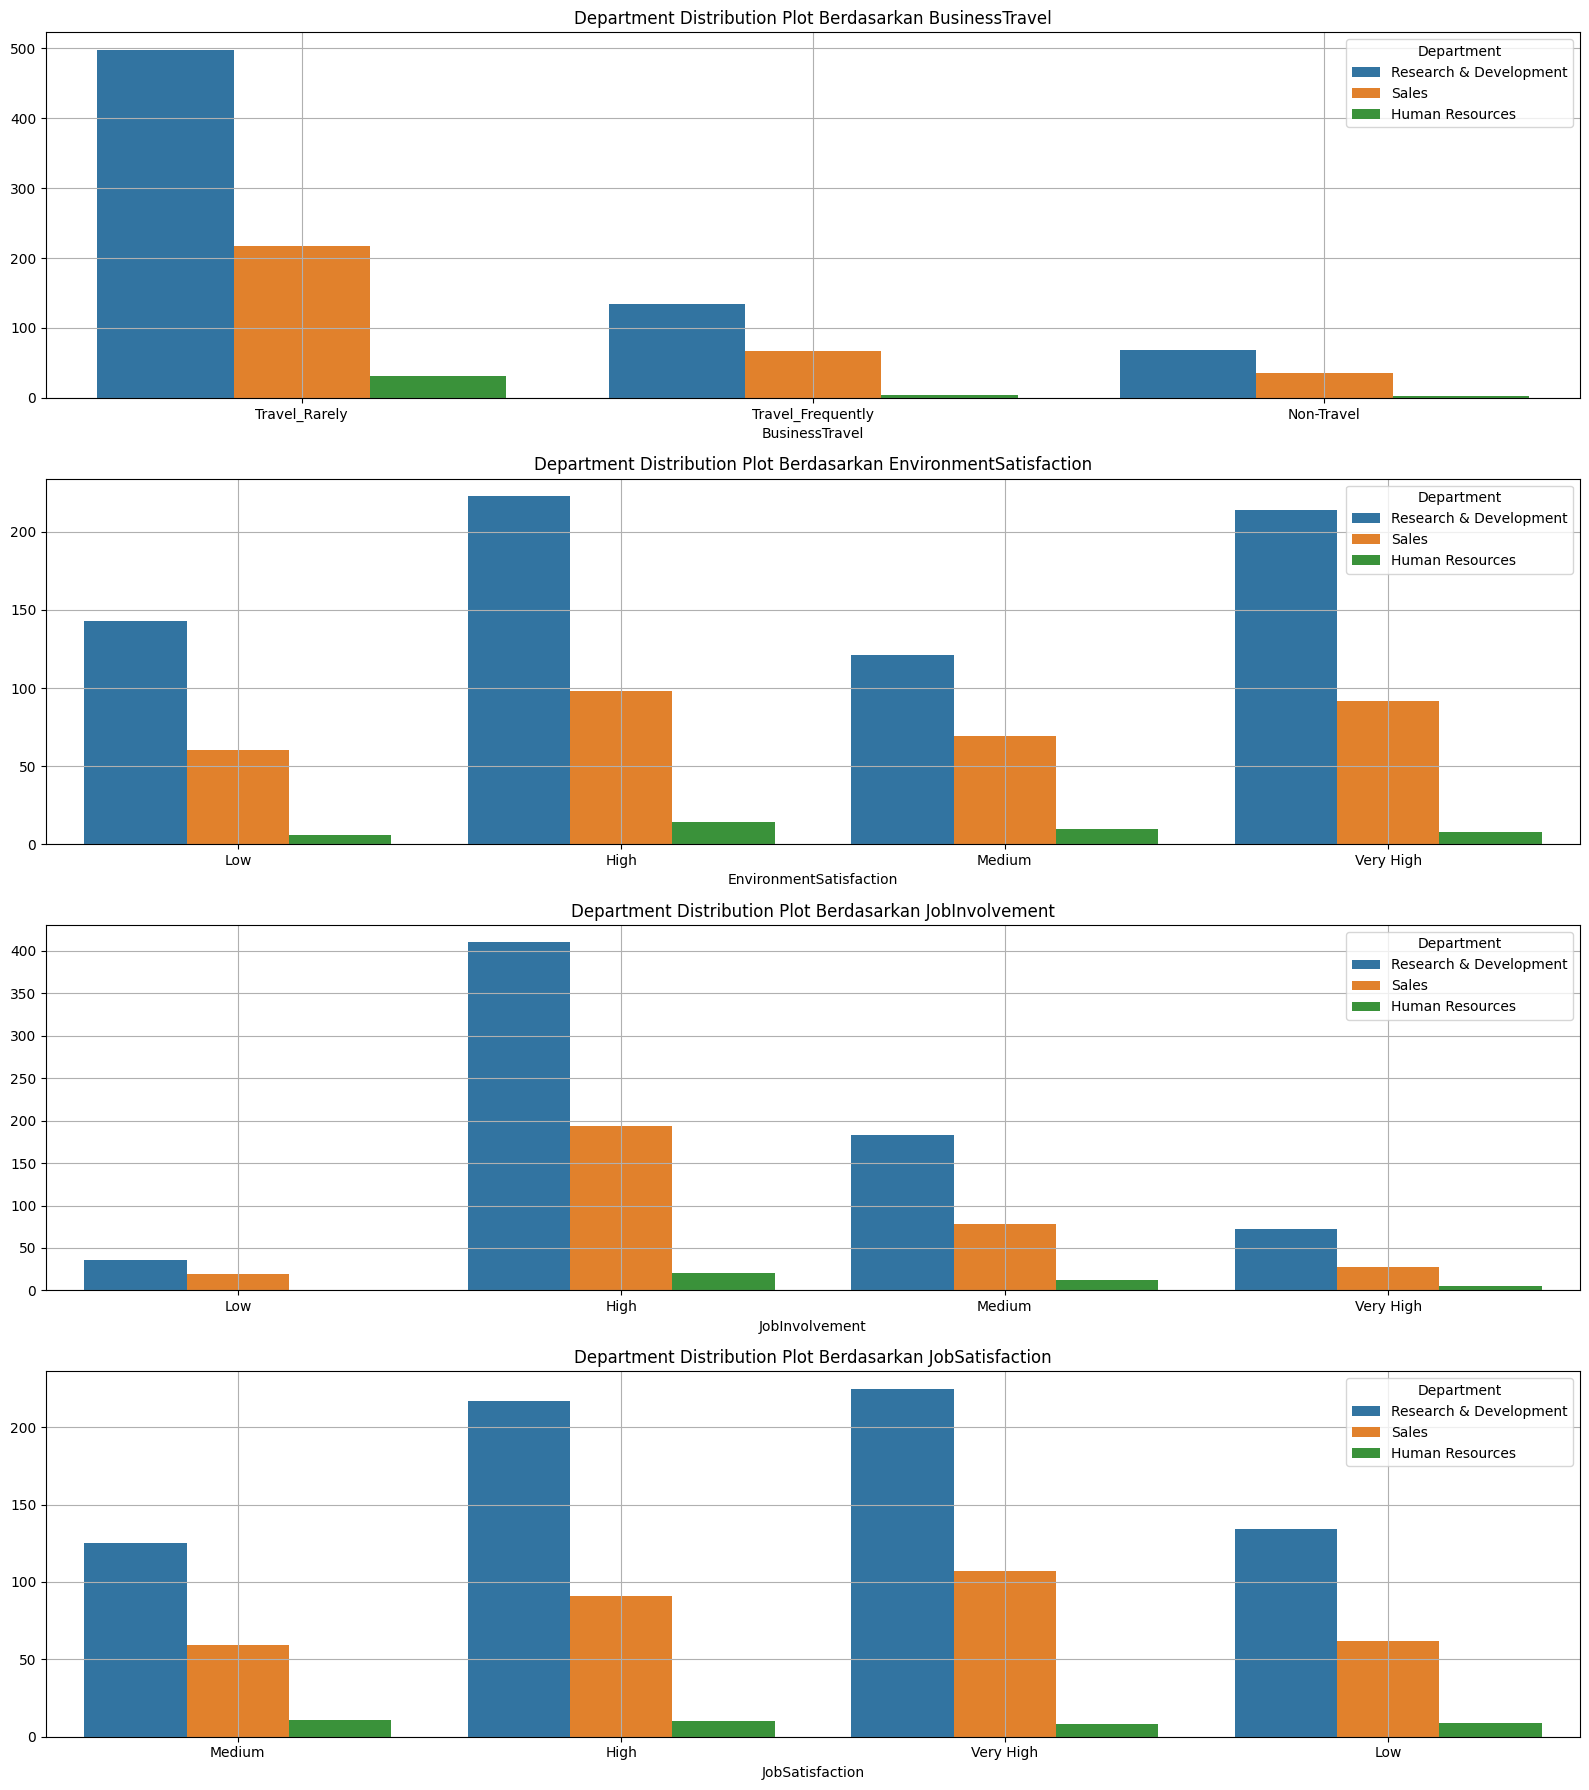

In [22]:
categorical_multivariate(
    features=['BusinessTravel', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobSatisfaction'],
    df=employee_df,
    label='Department'
)

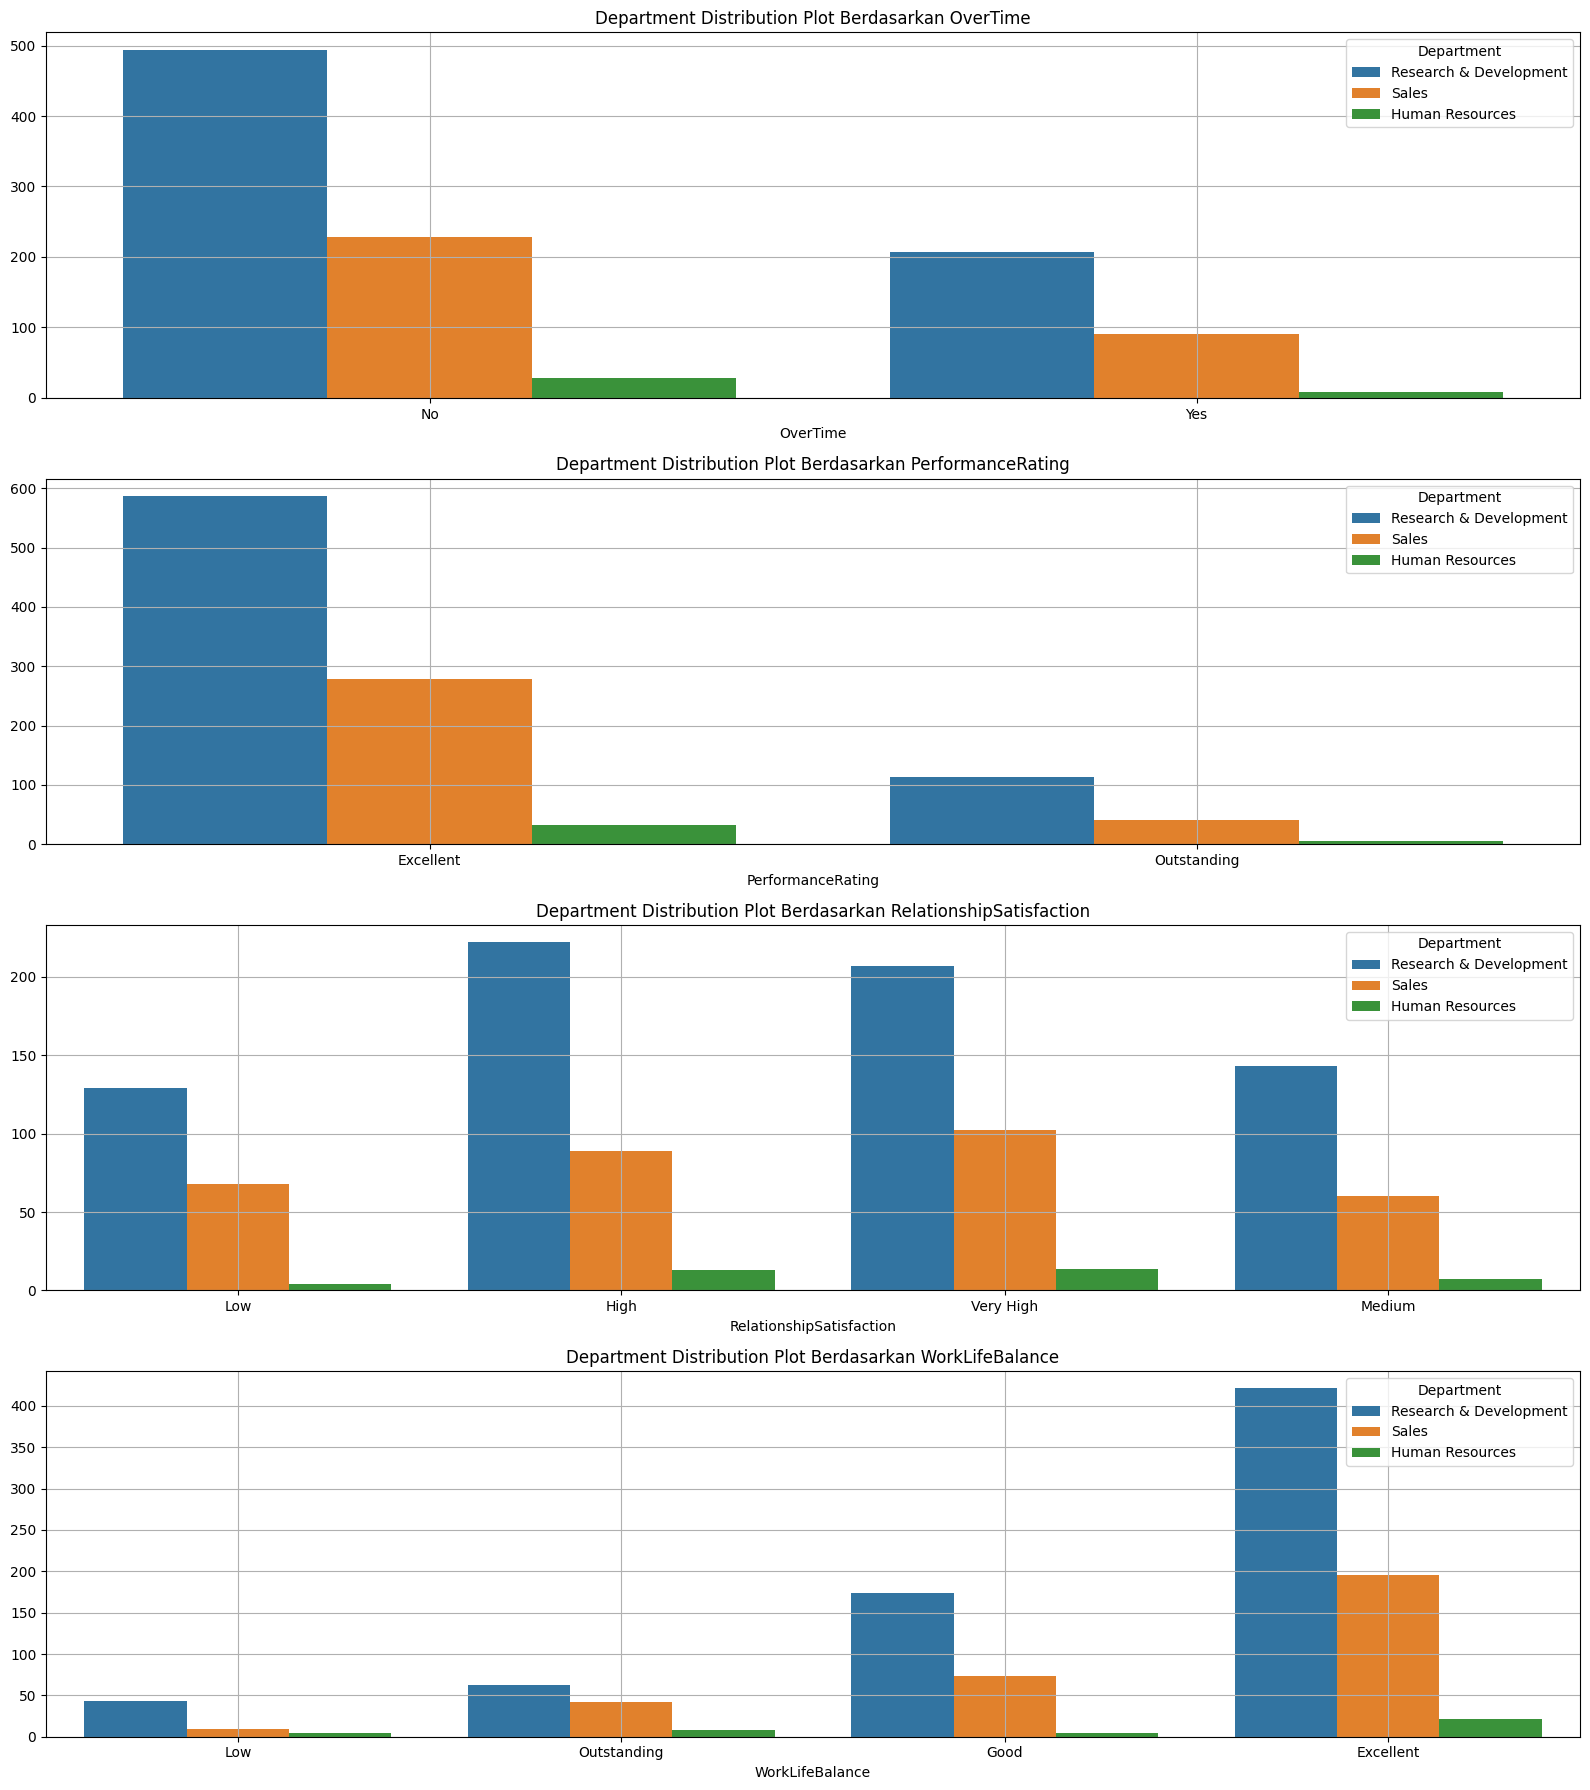

In [23]:
categorical_multivariate(
    features=['OverTime', 'PerformanceRating', 'RelationshipSatisfaction', 'WorkLifeBalance'],
    df=employee_df,
    label='Department'
)

#### Numerical Multivariate Analysis

In [24]:
def numerical_multivariate(features, df, label=None, cols=2):
    """Membuat boxplot untuk analisis multivariat dengan layout grid simetris.

    Args:
        - features (list): List fitur numerik yang ingin diplot.
        - df (DataFrame): DataFrame yang berisi data.
        - label (str, optional): Kolom kategori untuk hue (opsional).
        - cols (int): Jumlah kolom dalam grid (default = 2).
    """
    n_features = len(features)
    rows = int(np.ceil(n_features / cols))

    fig, ax = plt.subplots(rows, cols, figsize=(cols * 6, rows * 5))
    ax = ax.flatten()

    for i, feature in enumerate(features):
        sns.boxplot(y=label, x=feature, data=df, ax=ax[i])
        ax[i].set_title(f'{feature} berdasarkan {label}')
        ax[i].grid(color='lightgray', linestyle='--', linewidth=0.5)

    for i in range(n_features, len(ax)):
        fig.delax(ax[i])

    plt.tight_layout()
    plt.show()


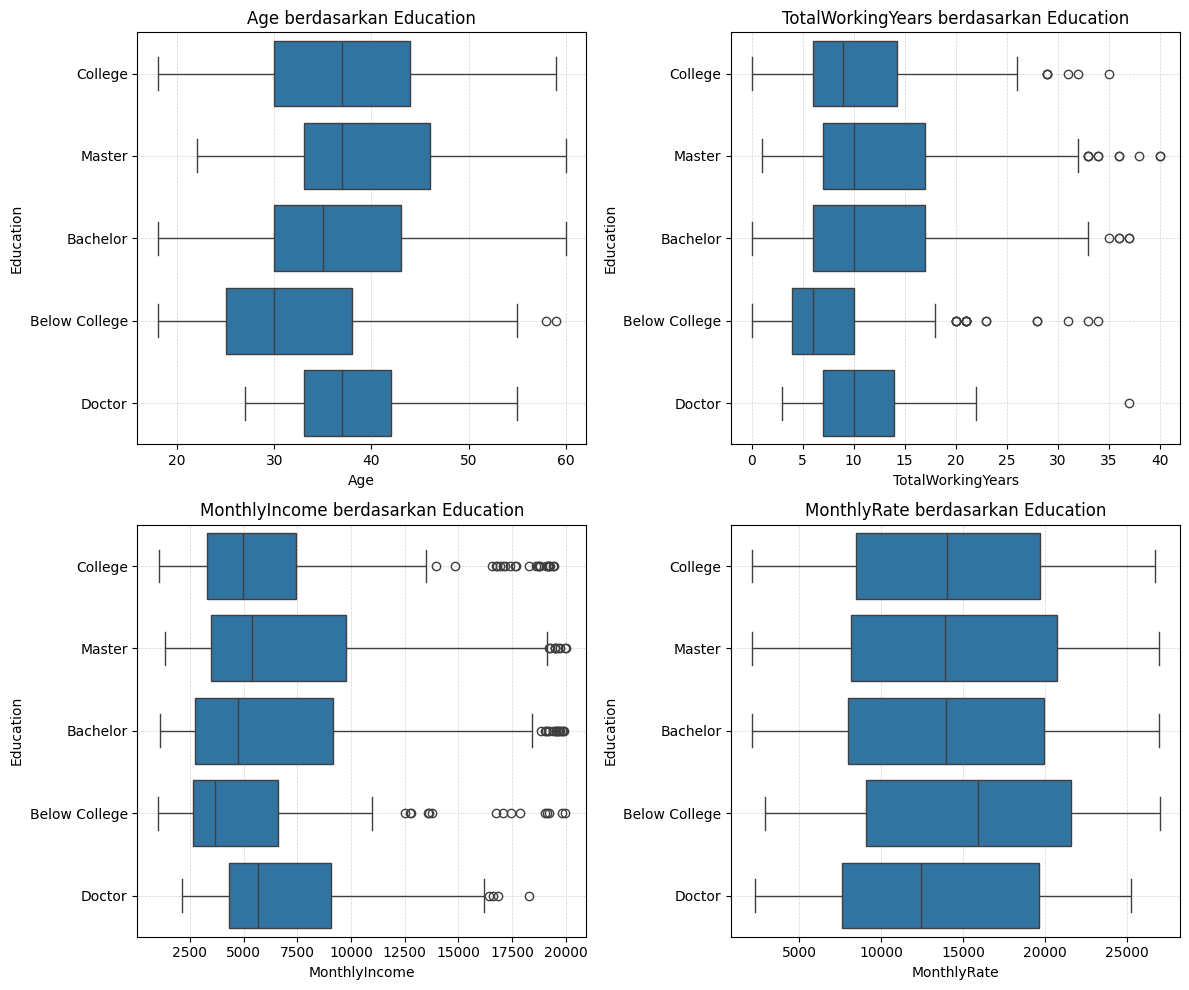

In [25]:
numerical_multivariate(
    features=['Age', 'TotalWorkingYears', 'MonthlyIncome', 'MonthlyRate'],
    df=employee_df,
    label='Education'
)

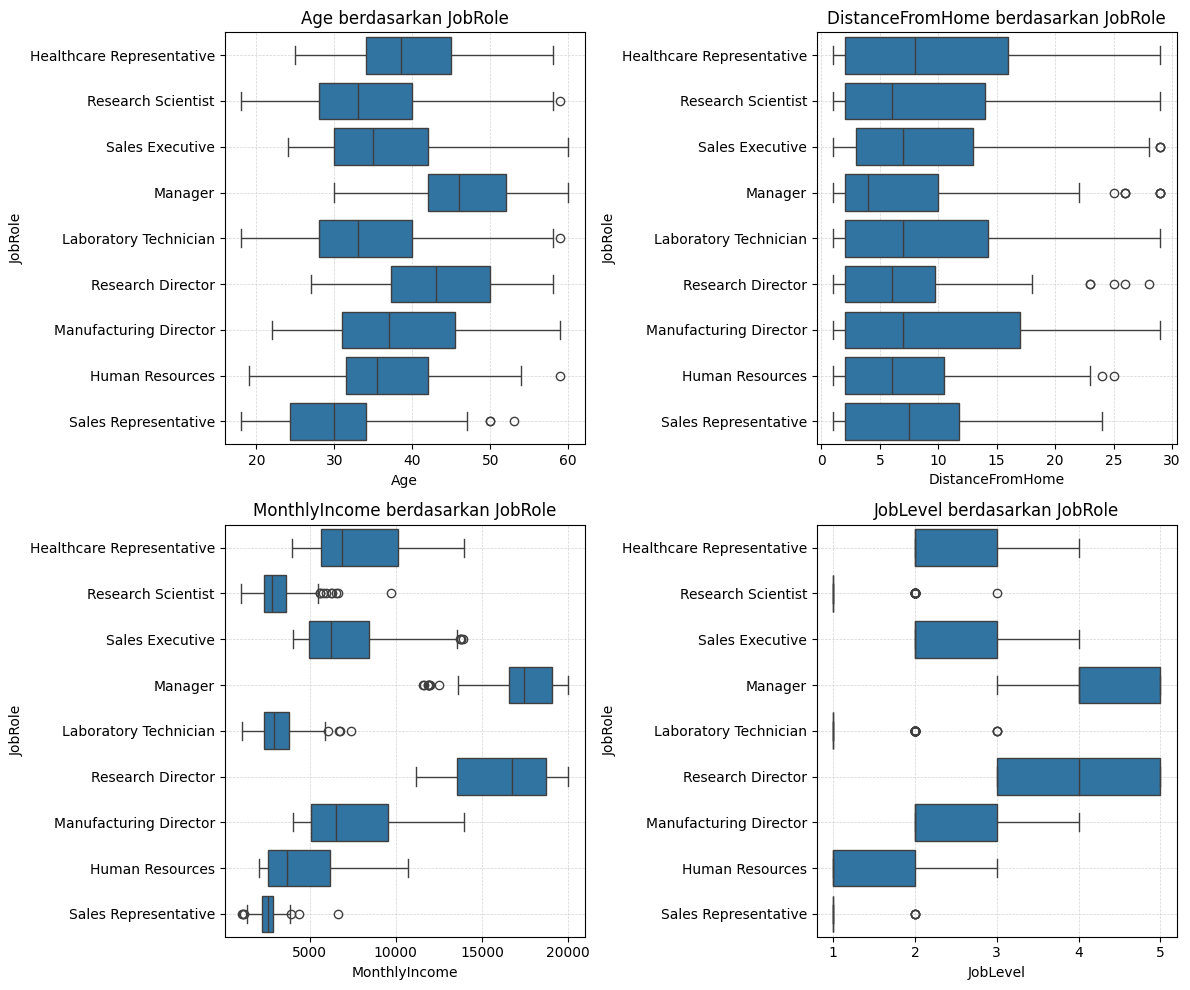

In [26]:
numerical_multivariate(
    features=['Age', 'DistanceFromHome', 'MonthlyIncome', 'JobLevel'],
    df=employee_df,
    label='JobRole'
)

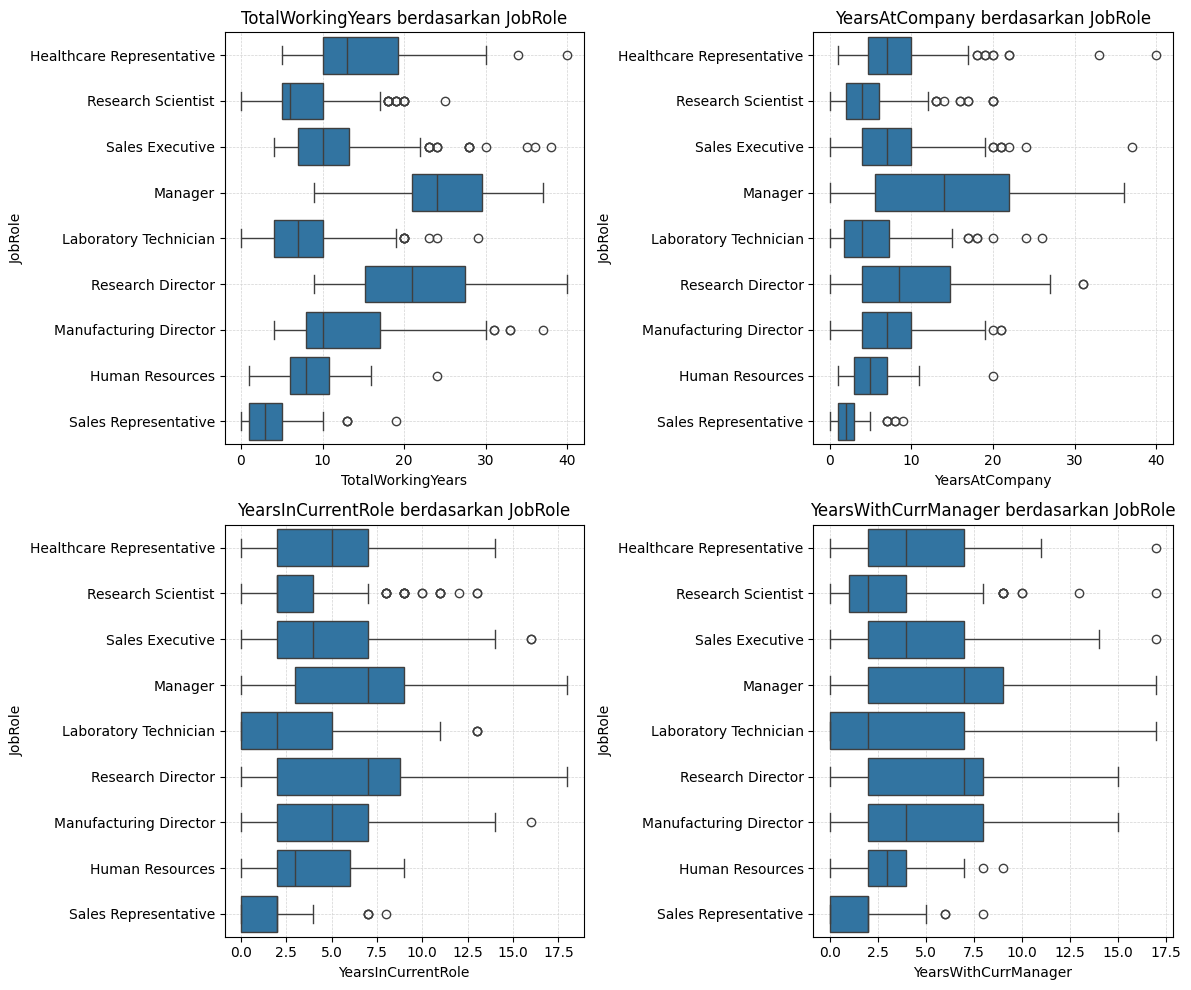

In [27]:
numerical_multivariate(
    features=['TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsWithCurrManager'],
    df=employee_df,
    label='JobRole'
)

#### Attrition

Text(0, 0.5, 'Count')

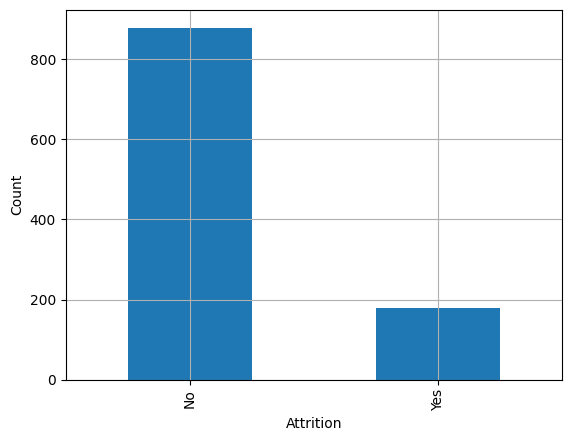

In [28]:
ax = employee_df['Attrition'].value_counts().plot(kind='bar')
ax.grid()
ax.set_ylabel('Count')

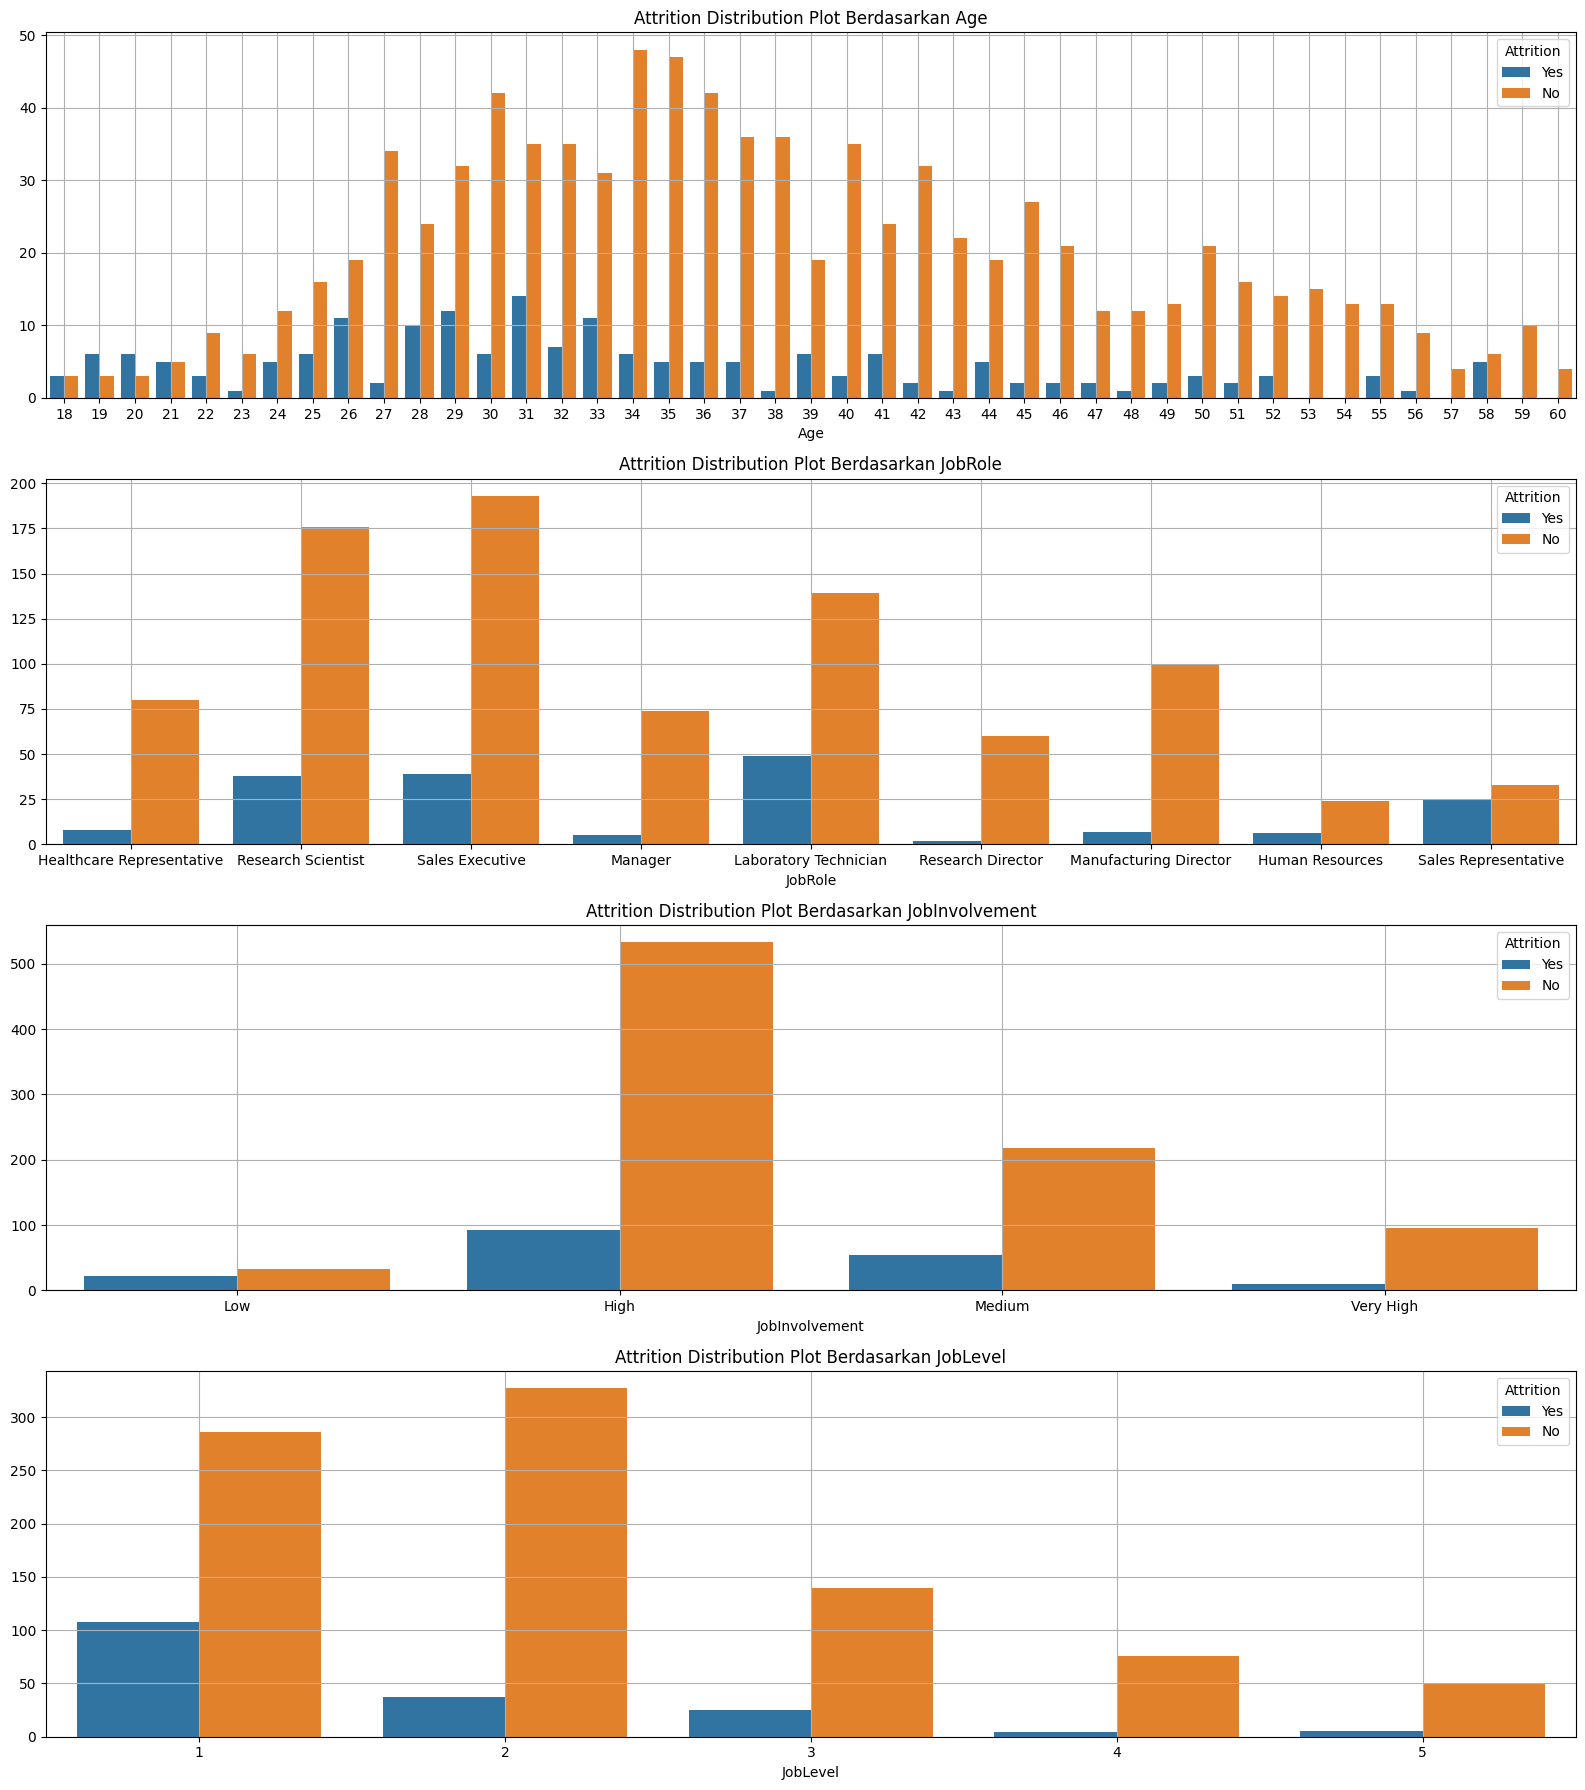

In [29]:
categorical_multivariate(
    features=['Age', 'JobRole', 'JobInvolvement', 'JobLevel'],
    df=employee_df,
    label='Attrition'
)

### Pre-processing

In [30]:
employee_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1058 entries, 1 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   EmployeeId                1058 non-null   int64 
 1   Age                       1058 non-null   int64 
 2   Attrition                 1058 non-null   object
 3   BusinessTravel            1058 non-null   object
 4   DailyRate                 1058 non-null   int64 
 5   Department                1058 non-null   object
 6   DistanceFromHome          1058 non-null   int64 
 7   Education                 1058 non-null   object
 8   EducationField            1058 non-null   object
 9   EmployeeCount             1058 non-null   int64 
 10  EnvironmentSatisfaction   1058 non-null   object
 11  Gender                    1058 non-null   object
 12  HourlyRate                1058 non-null   int64 
 13  JobInvolvement            1058 non-null   object
 14  JobLevel                  105

In [31]:
df = employee_df.drop(['EmployeeId', 'Over18'], axis=1)

df.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1,37,Yes,Travel_Rarely,1141,Research & Development,11,College,Medical,1,Low,...,Low,80,0,15,2,Low,1,0,0,0
2,51,Yes,Travel_Rarely,1323,Research & Development,4,Master,Life Sciences,1,Low,...,High,80,3,18,2,Outstanding,10,0,2,7
3,42,No,Travel_Frequently,555,Sales,26,Bachelor,Marketing,1,High,...,Very High,80,1,23,2,Outstanding,20,4,4,8
6,40,No,Travel_Rarely,1124,Sales,1,College,Medical,1,Medium,...,High,80,3,6,2,Good,4,3,0,2
7,55,Yes,Travel_Rarely,725,Research & Development,2,Bachelor,Medical,1,Very High,...,Very High,80,1,24,2,Excellent,5,2,1,4


In [32]:
numerical_features, categorical_features = [], []

for feature in df.columns:
    if df[feature].dtype == 'object':
        categorical_features.append(feature)
    else:
        numerical_features.append(feature)

In [33]:
print(numerical_features)
print(categorical_features)

['Age', 'DailyRate', 'DistanceFromHome', 'EmployeeCount', 'HourlyRate', 'JobLevel', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']
['Attrition', 'BusinessTravel', 'Department', 'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'OverTime', 'PerformanceRating', 'RelationshipSatisfaction', 'WorkLifeBalance']


In [34]:
scaler = MinMaxScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])

In [35]:
label_encoder = LabelEncoder()
df[categorical_features] = df[categorical_features].apply(lambda x: label_encoder.fit_transform(x))

In [36]:
df.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1,0.452381,1,2,0.743737,1,0.357143,2,3,0.0,1,...,1,0.0,0.000000,0.375,0.333333,2,0.025,0.000000,0.000000,0.000000
2,0.785714,1,2,0.874016,1,0.107143,4,1,0.0,1,...,0,0.0,1.000000,0.450,0.333333,3,0.250,0.000000,0.133333,0.411765
3,0.571429,0,1,0.324266,2,0.892857,0,2,0.0,0,...,3,0.0,0.333333,0.575,0.333333,3,0.500,0.222222,0.266667,0.470588
6,0.523810,0,2,0.731568,2,0.000000,2,3,0.0,2,...,0,0.0,1.000000,0.150,0.333333,1,0.100,0.166667,0.000000,0.117647
7,0.880952,1,2,0.445956,1,0.035714,0,3,0.0,3,...,3,0.0,0.333333,0.600,0.333333,0,0.125,0.111111,0.066667,0.235294


In [37]:
X = df.drop(columns=['Attrition'])
y = df['Attrition']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(846, 32) (212, 32) (846,) (212,)


In [38]:
print(y.shape)

(1058,)


## Modeling

In [39]:
models, accuracy, precision, recall, f1 = {}, {}, {}, {}, {}

models['LR'] = LogisticRegression(class_weight='balanced', max_iter=10000, random_state=42)
models['KNN'] = KNeighborsClassifier()
models['DT'] = DecisionTreeClassifier(class_weight='balanced', random_state=42)
models['RF'] = RandomForestClassifier(class_weight='balanced', random_state=42)
models['GB'] = GradientBoostingClassifier(random_state=42)
models['NN'] = MLPClassifier(random_state=42)

for i in models.keys():
    models[i].fit(X_train, y_train)

    prediction = models[i].predict(X_test)

    accuracy[i] = accuracy_score(prediction, y_test)
    precision[i] = precision_score(prediction, y_test)
    recall[i] = recall_score(prediction, y_test)
    f1[i] = f1_score(prediction, y_test)

In [40]:
model_metrics = pd.DataFrame({
    'Accuracy': accuracy.values(),
    'Precision': precision.values(),
    'Recall': recall.values(),
    'F1-Score': f1.values()
}, index=models.keys())

model_metrics

,Accuracy,Precision,Recall,F1-Score
LR,0.735849,0.769231,0.389610,0.517241
KNN,0.806604,0.076923,0.375000,0.127660
DT,0.801887,0.410256,0.457143,0.432432
RF,0.825472,0.051282,1.000000,0.097561
GB,0.849057,0.282051,0.733333,0.407407
NN,0.863208,0.410256,0.727273,0.524590


In [41]:
model_nn = MLPClassifier().fit(X_train, y_train)
model_nn

MLPClassifier()

In [42]:
y_train_nn = model_nn.predict(X_train)
y_test_nn = model_nn.predict(X_test)

## Evaluation

In [43]:
def eval_report(y_train, y_predict, name='Data'):
    """
    Args:
        y_train (np.ndarray): Label sebenarnya dari data uji.
        y_predict (np.ndarray): Label yang diprediksi oleh model.
        name (str, optional): Nama model atau dataset yang digunakan. Default 'Data'.
    """
    print(f'Classification Report Model {name}')
    print(classification_report(y_train, y_predict))

    cm = confusion_matrix(y_train, y_predict)
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt='d')
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show


Classification Report Model Training Data
              precision    recall  f1-score   support

           0       0.94      0.99      0.97       706
           1       0.95      0.68      0.79       140

    accuracy                           0.94       846
   macro avg       0.94      0.84      0.88       846
weighted avg       0.94      0.94      0.94       846



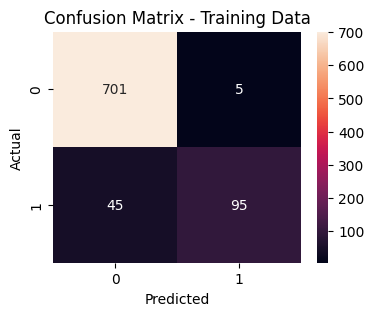

In [44]:
eval_report(y_train, y_train_nn, name='Training Data')

Classification Report Model Testing Data
              precision    recall  f1-score   support

           0       0.87      0.93      0.90       173
           1       0.56      0.38      0.45        39

    accuracy                           0.83       212
   macro avg       0.71      0.66      0.68       212
weighted avg       0.81      0.83      0.82       212



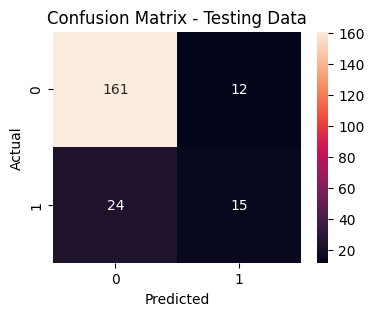

In [45]:
eval_report(y_test, y_test_nn, name='Testing Data')

In [47]:
# param_grid = {
#     'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 100)],
#     'activation': ['relu', 'tanh'],
#     'solver': ['adam', 'sgd'],
#     'alpha': [0.0001, 0.001, 0.01],
#     'learning_rate': ['constant', 'adaptive']
# }

# mlp = MLPClassifier(max_iter=500, random_state=42)

# grid_search = GridSearchCV(mlp, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)
# grid_search.fit(X_train, y_train)

# print(f"Best parameters: {grid_search.best_params_}")
# print(f"Best cross-validation score: {grid_search.best_score_}")

Fitting 5 folds for each of 96 candidates, totalling 480 fits


KeyboardInterrupt: 

In [ ]:
best_mlp = grid_search.best_estimator_
y_pred = best_mlp.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [51]:
joblib.dump(model_nn, 'model_nn.joblib')

['model_nn.joblib']

In [52]:
!pip freeze > requirements.txt